<h1 style="color:black;text-align:center;font-size:300%;font-family:verdana;">
Exploration + Data Pre-Processing
</h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Getting to know the Data 

In [2]:
data = pd.read_csv('FlightsDB.csv', parse_dates=['Snapshot Time', 'Departure Date', 'Return Date'], dayfirst=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540000 entries, 0 to 539999
Data columns (total 29 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   Origin                             540000 non-null  object        
 1   Destination                        540000 non-null  object        
 2   TTT                                540000 non-null  int64         
 3   LOS                                540000 non-null  int64         
 4   Departure Time                     540000 non-null  object        
 5   Departure Date                     540000 non-null  datetime64[ns]
 6   Arrival Time                       540000 non-null  object        
 7   Return Departure Time              540000 non-null  object        
 8   Return Date                        540000 non-null  datetime64[ns]
 9   Return Arrival Time                540000 non-null  object        
 10  Onward Departure Air

In [3]:
data.columns

Index(['Origin', 'Destination', 'TTT', 'LOS', 'Departure Time',
       'Departure Date', 'Arrival Time', 'Return Departure Time',
       'Return Date', 'Return Arrival Time', 'Onward Departure Airport',
       'Onward Arrival Airport', 'Return Departure Airport',
       'Return Arrival Airport', 'Onward Airlines', 'Return Airlines',
       'Onward Flight Connections', 'Onward Connection Duration(min)',
       'Onward Flight Connection Airport', 'Return Flight Connections',
       'Return Connection Duration(min)', 'Return Flight Connection Airport',
       'Carry-ons', 'Checked Bags', 'Price(NIS)', 'Snapshot Time', 'Site',
       'Total Onward Flight Duration(min)',
       'Total Return Flight Duration(min)'],
      dtype='object')

In [4]:
print(f"Rows: {data.shape[0]}, Columns: {data.shape[1]}")

Rows: 540000, Columns: 29


In [5]:
print(data.isnull().sum())

Origin                                    0
Destination                               0
TTT                                       0
LOS                                       0
Departure Time                            0
Departure Date                            0
Arrival Time                              0
Return Departure Time                     0
Return Date                               0
Return Arrival Time                       0
Onward Departure Airport                  0
Onward Arrival Airport                    0
Return Departure Airport                  0
Return Arrival Airport                    0
Onward Airlines                           0
Return Airlines                           0
Onward Flight Connections                 0
Onward Connection Duration(min)           0
Onward Flight Connection Airport     537245
Return Flight Connections                 0
Return Connection Duration(min)           0
Return Flight Connection Airport     537128
Carry-ons                       

In [6]:
data.head()

,Origin,Destination,TTT,LOS,Departure Time,Departure Date,Arrival Time,Return Departure Time,Return Date,Return Arrival Time,...,Return Flight Connections,Return Connection Duration(min),Return Flight Connection Airport,Carry-ons,Checked Bags,Price(NIS),Snapshot Time,Site,Total Onward Flight Duration(min),Total Return Flight Duration(min)
0,London,Rome,1,1,9:10,2025-03-07,12:40,6:45,2025-03-08,8:35,...,0,0,NaN,0,0,688,2025-03-06,Kayak,150,170
1,London,Rome,1,1,9:10,2025-03-07,12:40,6:35,2025-03-08,8:25,...,0,0,NaN,0,0,726,2025-03-06,Kayak,150,170
2,London,Rome,1,1,9:20,2025-03-07,12:50,6:45,2025-03-08,8:35,...,0,0,NaN,0,0,752,2025-03-06,Kayak,150,170
3,London,Rome,1,1,9:05,2025-03-07,12:35,11:05,2025-03-08,12:50,...,0,0,NaN,0,0,782,2025-03-06,Kayak,150,165
4,London,Rome,1,1,9:10,2025-03-07,12:40,6:45,2025-03-08,8:35,...,0,0,NaN,0,0,771,2025-03-06,Kayak,150,170


In [7]:
data.describe()

,TTT,LOS,Departure Date,Return Date,Onward Flight Connections,Onward Connection Duration(min),Return Flight Connections,Return Connection Duration(min),Carry-ons,Checked Bags,Price(NIS),Snapshot Time,Total Onward Flight Duration(min),Total Return Flight Duration(min)
count,540000.000000,540000.000000,540000,540000,540000.000000,540000.000000,540000.000000,540000.000000,540000.000000,540000.000000,540000.000000,540000,540000.000000,540000.000000
mean,15.500000,3.000000,2025-03-23 20:00:00.000000512,2025-03-26 19:59:59.999999744,0.005148,0.911606,0.005393,1.040463,0.114917,0.007333,609.968856,2025-03-08 08:00:00,121.390337,121.632189
min,1.000000,1.000000,2025-03-07 00:00:00,2025-03-08 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,168.000000,2025-03-06 00:00:00,60.000000,60.000000
25%,8.000000,2.000000,2025-03-16 00:00:00,2025-03-19 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,438.000000,2025-03-06 00:00:00,80.000000,80.000000
50%,15.500000,3.000000,2025-03-24 00:00:00,2025-03-27 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,592.000000,2025-03-09 00:00:00,130.000000,130.000000
75%,23.000000,4.000000,2025-03-31 00:00:00,2025-04-03 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,740.000000,2025-03-10 00:00:00,150.000000,150.000000
max,30.000000,5.000000,2025-04-09 00:00:00,2025-04-14 00:00:00,2.000000,1560.000000,2.000000,1785.000000,1.000000,2.000000,2810.000000,2025-03-10 00:00:00,2460.000000,2530.000000
std,8.655449,1.414215,NaN,NaN,0.072210,21.541368,0.074241,23.917243,0.318922,0.090359,235.259242,NaN,44.691912,46.554233


In [8]:
data.describe().round(2)


,TTT,LOS,Departure Date,Return Date,Onward Flight Connections,Onward Connection Duration(min),Return Flight Connections,Return Connection Duration(min),Carry-ons,Checked Bags,Price(NIS),Snapshot Time,Total Onward Flight Duration(min),Total Return Flight Duration(min)
count,540000.00,540000.00,540000,540000,540000.00,540000.00,540000.00,540000.00,540000.00,540000.00,540000.00,540000,540000.00,540000.00
mean,15.50,3.00,2025-03-23 20:00:00.000000512,2025-03-26 19:59:59.999999744,0.01,0.91,0.01,1.04,0.11,0.01,609.97,2025-03-08 08:00:00,121.39,121.63
min,1.00,1.00,2025-03-07 00:00:00,2025-03-08 00:00:00,0.00,0.00,0.00,0.00,0.00,0.00,168.00,2025-03-06 00:00:00,60.00,60.00
25%,8.00,2.00,2025-03-16 00:00:00,2025-03-19 00:00:00,0.00,0.00,0.00,0.00,0.00,0.00,438.00,2025-03-06 00:00:00,80.00,80.00
50%,15.50,3.00,2025-03-24 00:00:00,2025-03-27 00:00:00,0.00,0.00,0.00,0.00,0.00,0.00,592.00,2025-03-09 00:00:00,130.00,130.00
75%,23.00,4.00,2025-03-31 00:00:00,2025-04-03 00:00:00,0.00,0.00,0.00,0.00,0.00,0.00,740.00,2025-03-10 00:00:00,150.00,150.00
max,30.00,5.00,2025-04-09 00:00:00,2025-04-14 00:00:00,2.00,1560.00,2.00,1785.00,1.00,2.00,2810.00,2025-03-10 00:00:00,2460.00,2530.00
std,8.66,1.41,NaN,NaN,0.07,21.54,0.07,23.92,0.32,0.09,235.26,NaN,44.69,46.55


# Data Preparation
__________________________________________________________________________


In [9]:
data.rename(columns={'Snapshot Time': 'Snapshot Date'}, inplace=True)

In [10]:
data_copy = data.copy()

#### Converting Dates and Times and Calculating Additional Fields Based on Date and Time Values


In [11]:
for col in ['Arrival Time', 'Return Arrival Time']:
    problematic_values = data_copy[~data_copy[col].str.match(r'^\d{1,2}:\d{2}$', na=False)][col].unique()
    print(f"Problematic values in {col}: {problematic_values}")


Problematic values in Arrival Time: ['00:10+1' '00:35+1' '00:30+1' '06:45+1' '11:00+1' '23:15+1' '10:05+1'
 '14:20+1' '08:00+1' '07:55+1' '03:10+1' '01:30+1' '00:50+1' '08:20+1'
 '00:55+1' '00:20+1' '00:15+1' '00:25+1' '09:45+1' '07:50+1' '07:25+1'
 '05:25+1' '12:15+1' '22:00+1' '18:25+1' '06:10+1' '05:00+1' '09:30+1'
 '08:15+1' '10:55+1' '11:55+1' '12:05+1' '06:30+1' '09:00+1' '02:15+1'
 '07:10+1' '09:35+1' '11:50+1' '07:00+1' '07:15+1' '00:20+2' '18:35+1'
 '09:05+1' '08:35+1' '22:15+1' '13:50+1' '01:10+1' '07:40+1' '23:35+1'
 '14:30+1' '09:20+1' '10:20+1' '20:50+1' '11:25+1' '15:05+1']
Problematic values in Return Arrival Time: ['10:55+1' '05:25+1' '07:25+1' '08:15+1' '12:05+1' '03:10+1' '00:30+1'
 '00:10+1' '08:00+1' '06:10+1' '07:50+1' '05:00+1' '05:55+1' '20:55+1'
 '18:20+1' '22:50+1' '09:30+1' '06:55+1' '09:00+1' '07:00+1' '07:10+1'
 '11:00+1' '00:55+1' '10:05+1' '00:35+1' '14:20+1' '20:35+1' '21:25+1'
 '18:25+1' '07:55+1' '01:30+1' '22:00+1' '00:20+1' '08:20+1' '13:50+1'
 '00:15

In [12]:
data_copy['Arrival Time'][78]

'00:10+1'

In [13]:
for time_col, date_col in zip(['Arrival Time', 'Return Arrival Time'], ['Departure Date', 'Return Date']):
    # Extract extra days (e.g., +1, +2) from time values
    extra_days = data_copy[time_col].str.extract(r'(\d{1,2}):(\d{2})\+?(\d*)$')[2]
    extra_days = pd.to_numeric(extra_days, errors="coerce").fillna(0).astype(int)
    clean_times = data_copy[time_col].str.extract(r'(\d{1,2}:\d{2})')[0]  # Extract the time without `+1`
    
    # Create datetime by combining the correct date with the extracted time
    data_copy[time_col] = pd.to_datetime(data_copy[date_col].astype(str) + " " + clean_times, format="%Y-%m-%d %H:%M", errors='coerce')

    # Add the extra days to adjust the datetime values
    data_copy[time_col] = data_copy[time_col] + pd.to_timedelta(extra_days, unit="D")

In [14]:
data_copy['Arrival Time'][78]

Timestamp('2025-03-08 00:10:00')

In [15]:
print(data_copy[['Departure Date', 'Arrival Time']].head())  
print(data_copy[['Return Date', 'Return Arrival Time']].head())  

  Departure Date        Arrival Time
0     2025-03-07 2025-03-07 12:40:00
1     2025-03-07 2025-03-07 12:40:00
2     2025-03-07 2025-03-07 12:50:00
3     2025-03-07 2025-03-07 12:35:00
4     2025-03-07 2025-03-07 12:40:00
  Return Date Return Arrival Time
0  2025-03-08 2025-03-08 08:35:00
1  2025-03-08 2025-03-08 08:25:00
2  2025-03-08 2025-03-08 08:35:00
3  2025-03-08 2025-03-08 12:50:00
4  2025-03-08 2025-03-08 08:35:00


### Handling Time Data with Extra Days

Some `Arrival Time` and `Return Arrival Time` values include `+1`, `+2`, etc., indicating arrival on the next day(s).  

Steps:  
1. Extract extra days (`+1`, `+2`) and convert to integers.  
2. Extract the time (`HH:MM`) and remove `+` signs.  
3. Merge the time with the correct date (`Departure Date` or `Return Date`).  
4. Convert to `datetime64` and add the extra days.  

Now, all time values are correctly aligned with their actual date.


In [16]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540000 entries, 0 to 539999
Data columns (total 29 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   Origin                             540000 non-null  object        
 1   Destination                        540000 non-null  object        
 2   TTT                                540000 non-null  int64         
 3   LOS                                540000 non-null  int64         
 4   Departure Time                     540000 non-null  object        
 5   Departure Date                     540000 non-null  datetime64[ns]
 6   Arrival Time                       540000 non-null  datetime64[ns]
 7   Return Departure Time              540000 non-null  object        
 8   Return Date                        540000 non-null  datetime64[ns]
 9   Return Arrival Time                540000 non-null  datetime64[ns]
 10  Onward Departure Air

In [17]:
data_copy['Departure Time'][0]

'9:10'

In [18]:
for time_col, date_col in zip(['Departure Time', 'Return Departure Time'], 
                              ['Departure Date', 'Return Date']):
    # Convert time column to timedelta (hours and minutes)
    time_as_timedelta = pd.to_timedelta(data_copy[time_col].astype(str) + ':00', errors='coerce')  

    # Combine date with time
    data_copy[time_col] = data_copy[date_col] + time_as_timedelta

    # Ensure the column is stored as datetime64
    data_copy[time_col] = pd.to_datetime(data_copy[time_col], errors='coerce')



In [19]:
data_copy['Departure Time'][0]

Timestamp('2025-03-07 09:10:00')

In [20]:
print(data_copy.dtypes)


Origin                                       object
Destination                                  object
TTT                                           int64
LOS                                           int64
Departure Time                       datetime64[ns]
Departure Date                       datetime64[ns]
Arrival Time                         datetime64[ns]
Return Departure Time                datetime64[ns]
Return Date                          datetime64[ns]
Return Arrival Time                  datetime64[ns]
Onward Departure Airport                     object
Onward Arrival Airport                       object
Return Departure Airport                     object
Return Arrival Airport                       object
Onward Airlines                              object
Return Airlines                              object
Onward Flight Connections                     int64
Onward Connection Duration(min)               int64
Onward Flight Connection Airport             object
Return Fligh

In [21]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540000 entries, 0 to 539999
Data columns (total 29 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   Origin                             540000 non-null  object        
 1   Destination                        540000 non-null  object        
 2   TTT                                540000 non-null  int64         
 3   LOS                                540000 non-null  int64         
 4   Departure Time                     540000 non-null  datetime64[ns]
 5   Departure Date                     540000 non-null  datetime64[ns]
 6   Arrival Time                       540000 non-null  datetime64[ns]
 7   Return Departure Time              540000 non-null  datetime64[ns]
 8   Return Date                        540000 non-null  datetime64[ns]
 9   Return Arrival Time                540000 non-null  datetime64[ns]
 10  Onward Departure Air

In [22]:
# Extract time features
data_copy['Departure Month'] = data_copy['Departure Time'].dt.month
data_copy['Departure Day'] = data_copy['Departure Time'].dt.day
data_copy['Departure Hour'] = data_copy['Departure Time'].dt.hour
data_copy['Departure Weekday'] = (data_copy['Departure Time'].dt.weekday + 1) % 7  # Sunday=0, Saturday=6

data_copy['Return Month'] = data_copy['Return Departure Time'].dt.month
data_copy['Return Day'] = data_copy['Return Departure Time'].dt.day
data_copy['Return Hour'] = data_copy['Return Departure Time'].dt.hour
data_copy['Return Weekday'] = (data_copy['Return Departure Time'].dt.weekday + 1) % 7  # Sunday=0, Saturday=6



In [23]:
print(data_copy[['Departure Month', 'Departure Day', 'Departure Hour', 'Departure Weekday']].head())
print(data_copy[['Return Month', 'Return Day', 'Return Hour', 'Return Weekday']].head())

   Departure Month  Departure Day  Departure Hour  Departure Weekday
0                3              7               9                  5
1                3              7               9                  5
2                3              7               9                  5
3                3              7               9                  5
4                3              7               9                  5
   Return Month  Return Day  Return Hour  Return Weekday
0             3           8            6               6
1             3           8            6               6
2             3           8            6               6
3             3           8           11               6
4             3           8            6               6


In [24]:
# Function to categorize hours
def categorize_hour(hour):
    if pd.isna(hour):  # Preserve missing values
        return None
    if 0 <= hour <= 5:
        return 'Night'
    elif 6 <= hour <= 11:
        return 'Morning'
    elif 12 <= hour <= 17:
        return 'Afternoon'
    else:
        return 'Evening'

data_copy['Departure Time Category'] = data_copy['Departure Hour'].apply(categorize_hour)
data_copy['Return Time Category'] = data_copy['Return Hour'].apply(categorize_hour)

# Convert time categories to numeric values
time_category_mapping = {
    'Night': 0,      # 00:00 - 05:59
    'Morning': 1,    # 06:00 - 11:59
    'Afternoon': 2,  # 12:00 - 17:59
    'Evening': 3     # 18:00 - 23:59
}

data_copy['Departure Time Category Num'] = data_copy['Departure Time Category'].map(time_category_mapping)
data_copy['Return Time Category Num'] = data_copy['Return Time Category'].map(time_category_mapping)


In [25]:
# Remove old columns that are no longer needed (keeping only DateTime columns)
data_copy.drop(columns=[
    'Departure Date', 'Departure Time', 'Return Date', 'Return Departure Time', 
    'Departure Hour', 'Return Hour', 'Departure Time Category', 'Return Time Category'
], inplace=True)

# Final checks
print("📌 Time category mapping:")
print(time_category_mapping)

display(data_copy[['Departure Month', 'Departure Day', 'Departure Time Category Num', 'Departure Weekday']].head(10))
display(data_copy[['Return Month', 'Return Day', 'Return Time Category Num', 'Return Weekday']].head(10))

print("📌 Value counts per time category:")
print(data_copy['Departure Time Category Num'].value_counts(dropna=False))
print(data_copy['Return Time Category Num'].value_counts(dropna=False))

# 🚀 All set! 🎯


📌 Time category mapping:
{'Night': 0, 'Morning': 1, 'Afternoon': 2, 'Evening': 3}


,Departure Month,Departure Day,Departure Time Category Num,Departure Weekday
0,3,7,1,5
1,3,7,1,5
2,3,7,1,5
3,3,7,1,5
4,3,7,1,5
5,3,7,1,5
6,3,7,1,5
7,3,7,1,5
8,3,7,1,5
9,3,7,1,5


,Return Month,Return Day,Return Time Category Num,Return Weekday
0,3,8,1,6
1,3,8,1,6
2,3,8,1,6
3,3,8,1,6
4,3,8,1,6
5,3,8,1,6
6,3,8,1,6
7,3,8,3,6
8,3,8,1,6
9,3,8,1,6


📌 Value counts per time category:
Departure Time Category Num
1    230636
2    182223
3    125242
0      1899
Name: count, dtype: int64
Return Time Category Num
1    230704
2    176203
3    131102
0      1991
Name: count, dtype: int64


In [26]:
# Display 5 random rows
display(data_copy.sample(5))

,Origin,Destination,TTT,LOS,Arrival Time,Return Arrival Time,Onward Departure Airport,Onward Arrival Airport,Return Departure Airport,Return Arrival Airport,...,Total Onward Flight Duration(min),Total Return Flight Duration(min),Departure Month,Departure Day,Departure Weekday,Return Month,Return Day,Return Weekday,Departure Time Category Num,Return Time Category Num
84730,Rome,Paris,25,4,2025-03-31 08:15:00,2025-04-04 10:40:00,FCO,BVA,BVA,FCO,...,135,125,3,31,1,4,4,5,1,1
232593,Paris,London,27,2,2025-04-05 10:10:00,2025-04-07 18:45:00,CDG,LGW,LGW,CDG,...,70,75,4,5,6,4,7,1,1,2
246496,Rome,Paris,4,2,2025-03-13 12:20:00,2025-03-15 19:45:00,FCO,CDG,CDG,FCO,...,135,125,3,13,4,3,15,6,1,2
196346,Paris,London,9,1,2025-03-18 07:30:00,2025-03-19 16:55:00,CDG,LGW,LGW,ORY,...,70,80,3,18,2,3,19,3,1,2
90507,London,Rome,1,3,2025-03-07 22:50:00,2025-03-10 13:20:00,LHR,FCO,FCO,LHR,...,155,170,3,7,5,3,10,1,3,1


In [27]:
# Mapping weekdays: False = Not Weekend (Monday-Thursday), True = Weekend (Friday-Sunday)
weekend_mapping = {0: False, 1: False, 2: False, 3: False,  # Monday-Thursday = False (Not Weekend)
                   4: True, 5: True, 6: True}        # Friday-Sunday = True (Weekend)

# Create the new column based on the mapping
data_copy['Is Weekend Flight'] = data_copy['Departure Weekday'].map(weekend_mapping)

# Verify the result
print(data_copy[['Departure Weekday', 'Is Weekend Flight']].head())


   Departure Weekday  Is Weekend Flight
0                  5               True
1                  5               True
2                  5               True
3                  5               True
4                  5               True


In [28]:
# Count the number of midweek and weekend flights
weekend_flight_counts = data_copy['Is Weekend Flight'].value_counts()

# Print the results in a readable format
print(f"🔹 Midweek flights: {weekend_flight_counts.get(0, 0)}")
print(f"🔹 Weekend flights: {weekend_flight_counts.get(1, 0)}")

🔹 Midweek flights: 312000
🔹 Weekend flights: 228000


### Handling the 'Site' Column


In [29]:
# Check unique values in the 'Site' column before mapping
print(data_copy['Site'].unique())

['Kayak' 'Momondo']


### Adding Airport Distance from City Center


In [30]:
# Step 1: Update the dictionary with airport information including SOU
airports_info = {
    'London': {
        'Heathrow': {'code': 'LHR', 'distance_from_city_center(km)': '23'},
        'Gatwick': {'code': 'LGW', 'distance_from_city_center(km)': '45'},
        'Stansted': {'code': 'STN', 'distance_from_city_center(km)': '64'},
        'Luton': {'code': 'LTN', 'distance_from_city_center(km)': '56'},
        'City': {'code': 'LCY', 'distance_from_city_center(km)': '11'},
        'Southend': {'code': 'SEN', 'distance_from_city_center(km)': '64'},
        'Southampton': {'code': 'SOU', 'distance_from_city_center(km)': '110'},  # Added SOU
    },
    'Rome': {
        'Fiumicino': {'code': 'FCO', 'distance_from_city_center(km)': '32'},
        'Ciampino': {'code': 'CIA', 'distance_from_city_center(km)': '15'},
    },
    'Paris': {
        'Charles de Gaulle': {'code': 'CDG', 'distance_from_city_center(km)': '25'},
        'Orly': {'code': 'ORY', 'distance_from_city_center(km)': '13'},
        'Beauvais-Tille': {'code': 'BVA', 'distance_from_city_center(km)': '85'},
    }
}


In [31]:
# Step 2: Create a dictionary to translate from airport code to distance from city center
airport_distances = {}

for city, airports in airports_info.items():
    for airport_name, details in airports.items():
        if 'distance_from_city_center(km)' in details:
            if 'code' in details:
                airport_code = details['code'].upper()  # Convert code to uppercase
                airport_distances[airport_code] = float(details['distance_from_city_center(km)'])  # Convert to float


In [32]:
# Step 3: Function to get the distance by airport code
def get_airport_distance(airport):
    if pd.isna(airport):  # If the value is missing, return None
        return None
    return airport_distances.get(airport.upper(), None)  # Compare by code in uppercase


In [33]:
# Step 4: Add the distances for each airport in the table
data_copy['Onward Departure Airport Distance'] = data_copy['Onward Departure Airport'].apply(get_airport_distance)
data_copy['Onward Arrival Airport Distance'] = data_copy['Onward Arrival Airport'].apply(get_airport_distance)
data_copy['Return Departure Airport Distance'] = data_copy['Return Departure Airport'].apply(get_airport_distance)
data_copy['Return Arrival Airport Distance'] = data_copy['Return Arrival Airport'].apply(get_airport_distance)


In [34]:
# Step 5: Show examples for verification
print("Examples after the fix:")
display(data_copy[['Onward Departure Airport', 'Onward Departure Airport Distance',
                 'Onward Arrival Airport', 'Onward Arrival Airport Distance',
                 'Return Departure Airport', 'Return Departure Airport Distance',
                 'Return Arrival Airport', 'Return Arrival Airport Distance']].sample(10))

# All cleaned up!


Examples after the fix:


,Onward Departure Airport,Onward Departure Airport Distance,Onward Arrival Airport,Onward Arrival Airport Distance,Return Departure Airport,Return Departure Airport Distance,Return Arrival Airport,Return Arrival Airport Distance
192138,FCO,32.0,LGW,45.0,LGW,45.0,FCO,32.0
460840,CDG,25.0,LGW,45.0,LHR,23.0,ORY,13.0
227341,CDG,25.0,LTN,56.0,LGW,45.0,CDG,25.0
72172,FCO,32.0,BVA,85.0,ORY,13.0,FCO,32.0
13250,STN,64.0,CIA,15.0,CIA,15.0,STN,64.0
504324,CDG,25.0,LGW,45.0,LGW,45.0,CDG,25.0
349649,LGW,45.0,FCO,32.0,FCO,32.0,LGW,45.0
25615,LGW,45.0,CDG,25.0,CDG,25.0,LGW,45.0
438573,FCO,32.0,ORY,13.0,CDG,25.0,FCO,32.0
385037,LGW,45.0,FCO,32.0,FCO,32.0,LGW,45.0


In [35]:
# Finding airport codes missing distance information
missing_airports = set()

# Check each airport column to see if it is missing distance information
for col in ['Onward Departure Airport', 'Onward Arrival Airport', 
            'Return Departure Airport', 'Return Arrival Airport']:
    missing_airports.update(data_copy[col][data_copy[col].notnull() & data_copy[f"{col} Distance"].isnull()])

# Display the list of airports missing distance information
print("📌 Airport codes with missing distance information:")
print(missing_airports)

📌 Airport codes with missing distance information:
{'PAR', 'LON', 'ROM'}


In [36]:
# General airport codes that represent cities rather than specific airports
general_airport_codes = {'LON', 'ROM', 'PAR'}

# Filter rows where city codes appear instead of specific airports
problematic_rows = data_copy[
    data_copy['Onward Departure Airport'].isin(general_airport_codes) |
    data_copy['Onward Arrival Airport'].isin(general_airport_codes) |
    data_copy['Return Departure Airport'].isin(general_airport_codes) |
    data_copy['Return Arrival Airport'].isin(general_airport_codes)
]

# Display the first 10 rows with this issue
print(problematic_rows[['Onward Departure Airport', 'Onward Arrival Airport',
                        'Return Departure Airport', 'Return Arrival Airport']].head(10))

     Onward Departure Airport Onward Arrival Airport Return Departure Airport  \
201                       LON                    PAR                      PAR   
1501                      LON                    PAR                      PAR   
1901                      LON                    PAR                      PAR   
2501                      LON                    PAR                      PAR   
3201                      LON                    PAR                      PAR   
4199                      LON                    PAR                      PAR   
4878                      LTN                    CDG                      PAR   
5674                      LTN                    CDG                      PAR   
6101                      LON                    PAR                      PAR   
6588                      LTN                    CDG                      PAR   

     Return Arrival Airport  
201                     LON  
1501                    LON  
1901              

In [37]:
problematic_rows['Onward Airlines'].value_counts()

Onward Airlines
Eurostar           368
FlixBus             95
Vueling             36
easyJet             22
British Airways     16
BlaBlaBus            6
Union Ivkoni         5
Name: count, dtype: int64

In [38]:
problematic_rows['Return Airlines'].value_counts()

Return Airlines
Eurostar           393
FlixBus             96
Vueling             28
easyJet             15
Union Ivkoni         6
British Airways      6
BlaBlaBus            4
Name: count, dtype: int64

In [39]:
# Remove non-airlines:
strings_to_remove = ['Eurostar', 'FlixBus', 'Union Ivkoni', 'BlaBlaBus']
data_copy_test = data_copy[~data_copy['Return Airlines'].str.contains('|'.join(strings_to_remove), na=False) & 
            ~data_copy['Onward Airlines'].str.contains('|'.join(strings_to_remove), na=False)]


In [40]:
# Display data reduction details
print(f"Original data size: {data_copy.shape[0]}")
print(f"Filtered data size: {data_copy_test.shape[0]}")
removed_percentage = (1 - (data_copy_test.shape[0] / data_copy.shape[0])) * 100
print(f"Percentage of removed rows: {removed_percentage:.3f}%")

Original data size: 540000
Filtered data size: 539452
Percentage of removed rows: 0.101%


In [41]:
data_copy = data_copy_test.copy()

In [42]:
# Finding airport codes missing distance information
missing_airports = set()

# Check each airport column to see if it is missing distance information
for col in ['Onward Departure Airport', 'Onward Arrival Airport', 
            'Return Departure Airport', 'Return Arrival Airport']:
    missing_airports.update(data_copy[col][data_copy[col].notnull() & data_copy[f"{col} Distance"].isnull()])

# Display the list of airports missing distance information
print("📌 Airport codes with missing distance information:")
print(missing_airports)

📌 Airport codes with missing distance information:
set()


### Handling Missing Airport Distances

Some airport codes (`LON`, `PAR`, `ROM`) represent cities rather than specific airports, leading to missing distance values. To fix this, we replaced these missing values with the average distance of all airports in the respective city.


In [43]:
# # Handling flights with missing distance info

# # Define city-to-airports mapping
# city_airports = {
#     'LON': ['LHR', 'LGW', 'STN', 'LTN', 'LCY', 'SEN'],
#     'ROM': ['FCO', 'CIA'],
#     'PAR': ['CDG', 'ORY', 'BVA']
# }

# # Compute average distances for each city
# city_avg_distances = {
#     city: data_copy.loc[data_copy['Onward Departure Airport'].isin(airports), 'Onward Departure Airport Distance'].mean()
#     for city, airports in city_airports.items()
# }

# # List of columns to update
# airport_columns = ['Onward Departure Airport', 'Onward Arrival Airport', 'Return Departure Airport', 'Return Arrival Airport']

# # Update distances directly
# for col in airport_columns:
#     distance_col = f"{col} Distance"
    
#     # Map city codes ('LON', 'ROM', 'PAR') to their average distances
#     data_copy[distance_col] = data_copy[distance_col].fillna(data_copy[col].map(city_avg_distances))

# # Check for remaining missing values
# missing_values = data_copy[[f"{col} Distance" for col in airport_columns]].isnull().sum()

# print("📌 Check after filling in the missing values:")
# print(missing_values)
# print("✅ The distances have been updated based on the city's average distances!")


### Adding a Computed Field for Total Number of Connections


In [44]:
data_copy['Total Connections'] = data_copy['Onward Flight Connections'] + data_copy['Return Flight Connections']

In [45]:
data_copy.describe()

,TTT,LOS,Arrival Time,Return Arrival Time,Onward Flight Connections,Onward Connection Duration(min),Return Flight Connections,Return Connection Duration(min),Carry-ons,Checked Bags,...,Return Month,Return Day,Return Weekday,Departure Time Category Num,Return Time Category Num,Onward Departure Airport Distance,Onward Arrival Airport Distance,Return Departure Airport Distance,Return Arrival Airport Distance,Total Connections
count,539452.000000,539452.000000,539452,539452,539452.000000,539452.000000,539452.000000,539452.000000,539452.000000,539452.000000,...,539452.000000,539452.000000,539452.000000,539452.000000,539452.000000,539452.000000,539452.000000,539452.000000,539452.000000,539452.000000
mean,15.498293,3.000006,2025-03-24 10:54:18.450612480,2025-03-27 10:54:38.037156352,0.005146,0.911438,0.005387,1.040825,0.114240,0.006816,...,3.344314,16.157851,3.008918,1.797708,1.808029,33.572774,33.207064,33.613222,33.233061,0.010533
min,1.000000,1.000000,2025-03-07 00:10:00,2025-03-08 00:30:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,11.000000,11.000000,11.000000,11.000000,0.000000
25%,8.000000,2.000000,2025-03-16 18:05:00,2025-03-19 20:20:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.000000,8.000000,1.000000,1.000000,1.000000,23.000000,23.000000,23.000000,23.000000,0.000000
50%,15.000000,3.000000,2025-03-24 11:50:00,2025-03-27 11:50:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.000000,17.000000,3.000000,2.000000,2.000000,32.000000,32.000000,32.000000,32.000000,0.000000
75%,23.000000,4.000000,2025-03-31 21:15:00,2025-04-03 21:30:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,24.000000,5.000000,2.000000,2.000000,45.000000,45.000000,45.000000,45.000000,0.000000
max,30.000000,5.000000,2025-04-10 22:15:00,2025-04-15 00:55:00,2.000000,1560.000000,2.000000,1785.000000,1.000000,2.000000,...,4.000000,31.000000,6.000000,3.000000,3.000000,85.000000,85.000000,85.000000,85.000000,3.000000
std,8.655260,1.414252,NaN,NaN,0.072195,21.548484,0.074179,23.928201,0.318103,0.084457,...,0.475145,9.041508,2.003328,0.794989,0.804817,16.755008,16.301730,16.847694,16.478378,0.107121


### Adding a Total Flight Duration for all Onward and Return flights


In [46]:
data_copy['Total Flight Duration(min)'] = data_copy['Total Onward Flight Duration(min)'] + data_copy['Total Return Flight Duration(min)']

## Data Preparation Summary

- **Converted date and time columns** into proper `datetime` objects and extracted key time features.  
- **Mapped airport distances** from city centers based on airport codes.  
- **Replaced missing airport distances** for general city codes (`LON`, `PAR`, `ROM`) with the average distance of all airports in the respective city.  
- **Classified flights** as midweek or weekend based on departure day.  
- **Created a computed field** for the total number of connections.  
- **Checked and mapped 'Site' values** to ensure consistency.  
- **Created a Total Duration field** for all flights.

The dataset is now structured and ready for analysis. 🚀

## Flight Price Outlier Analysis
-------------------------------

Removed outliers in Price (NIS) using Tukey’s IQR method.
Visualized price distribution before and after removal.

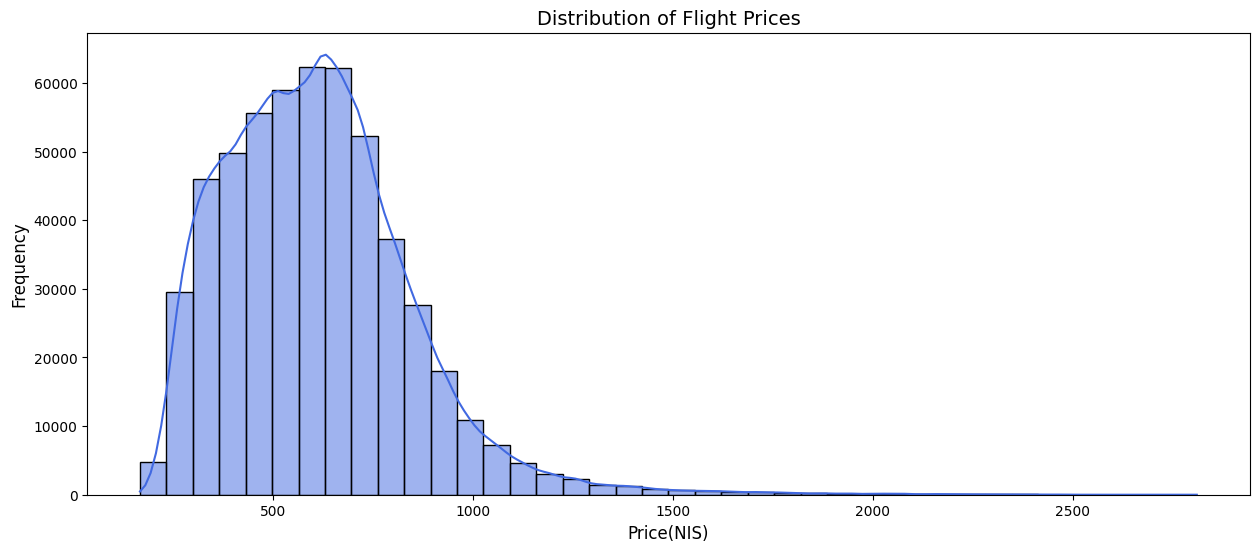

In [47]:
# Visualizing the distribution of flight prices to identify trends and outliers.

plt.figure(figsize=(15, 6))
sns.histplot(data_copy_test["Price(NIS)"], bins=40, kde=True, color="royalblue")
plt.title("Distribution of Flight Prices", fontsize=14)
plt.xlabel("Price(NIS)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

plt.show()

In [48]:
def remove_outliers(route):
    Q1 = route["Price(NIS)"].quantile(0.25)
    Q3 = route["Price(NIS)"].quantile(0.75)
    IQR = Q3 - Q1

    # Defining the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Return only non-outlier rows
    return route[(route["Price(NIS)"] >= lower_bound) & (route["Price(NIS)"] <= upper_bound)]

In [49]:
test_clean_data = data_copy.groupby(['Origin', 'Destination'], group_keys=False).apply(remove_outliers)

C:\Users\galha\AppData\Local\Temp\ipykernel_16392\3892453825.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  test_clean_data = data_copy.groupby(['Origin', 'Destination'], group_keys=False).apply(remove_outliers)


In [50]:
# Display data reduction details
print(f"Original data size: {data_copy.shape[0]}")
print(f"Filtered data size: {test_clean_data.shape[0]}")
removed_percentage = (1 - (test_clean_data.shape[0] / data_copy.shape[0])) * 100
print(f"Percentage of removed rows: {removed_percentage:.2f}%")

Original data size: 539452
Filtered data size: 527232
Percentage of removed rows: 2.27%


In [51]:
data_copy = test_clean_data.copy()

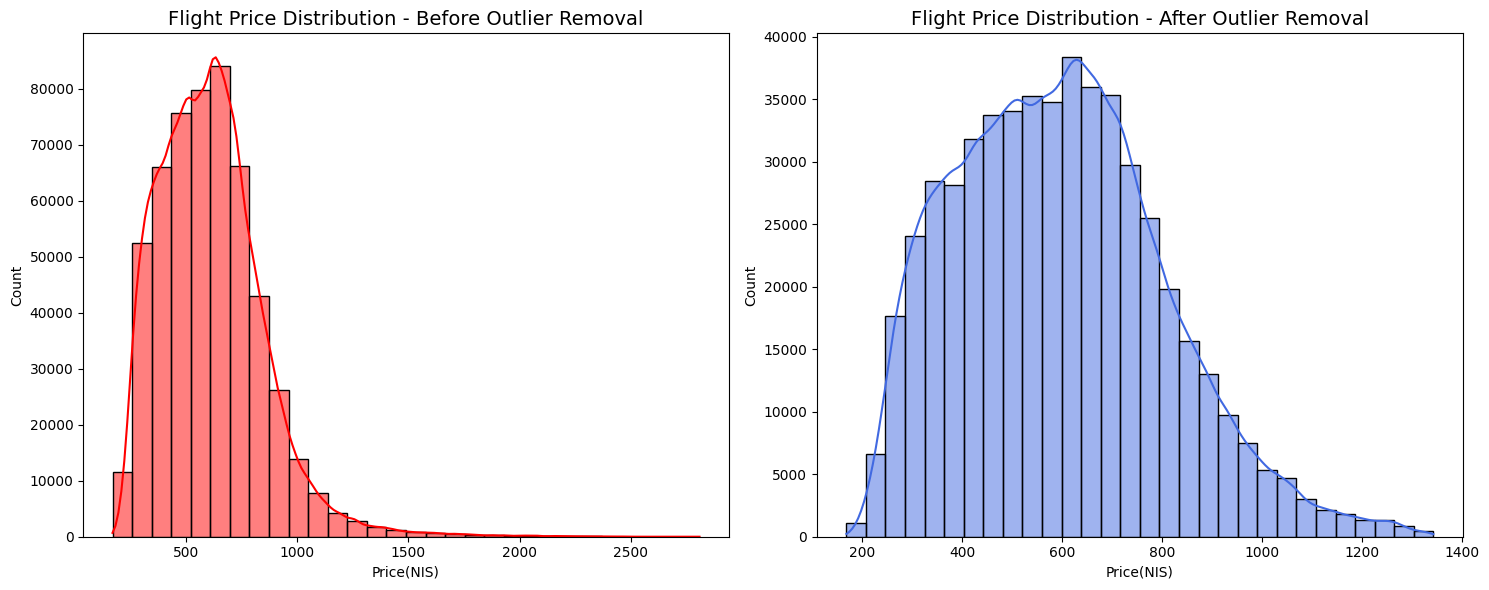

In [52]:
# Comparing flight price distribution before and after outlier removal
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.histplot(data["Price(NIS)"], bins=30, kde=True, color="red", ax=axes[0])
axes[0].set_title("Flight Price Distribution - Before Outlier Removal", fontsize=14)

sns.histplot(data_copy["Price(NIS)"], bins=30, kde=True, color="royalblue", ax=axes[1])
axes[1].set_title("Flight Price Distribution - After Outlier Removal", fontsize=14)

plt.tight_layout()
plt.show()

# The histograms illustrate how removing outliers affects the price distribution, 
# making it more representative of typical flight prices.

# Visual Exploration of the Data: Understanding Key Patterns and Trends
__________________________________________________________________________


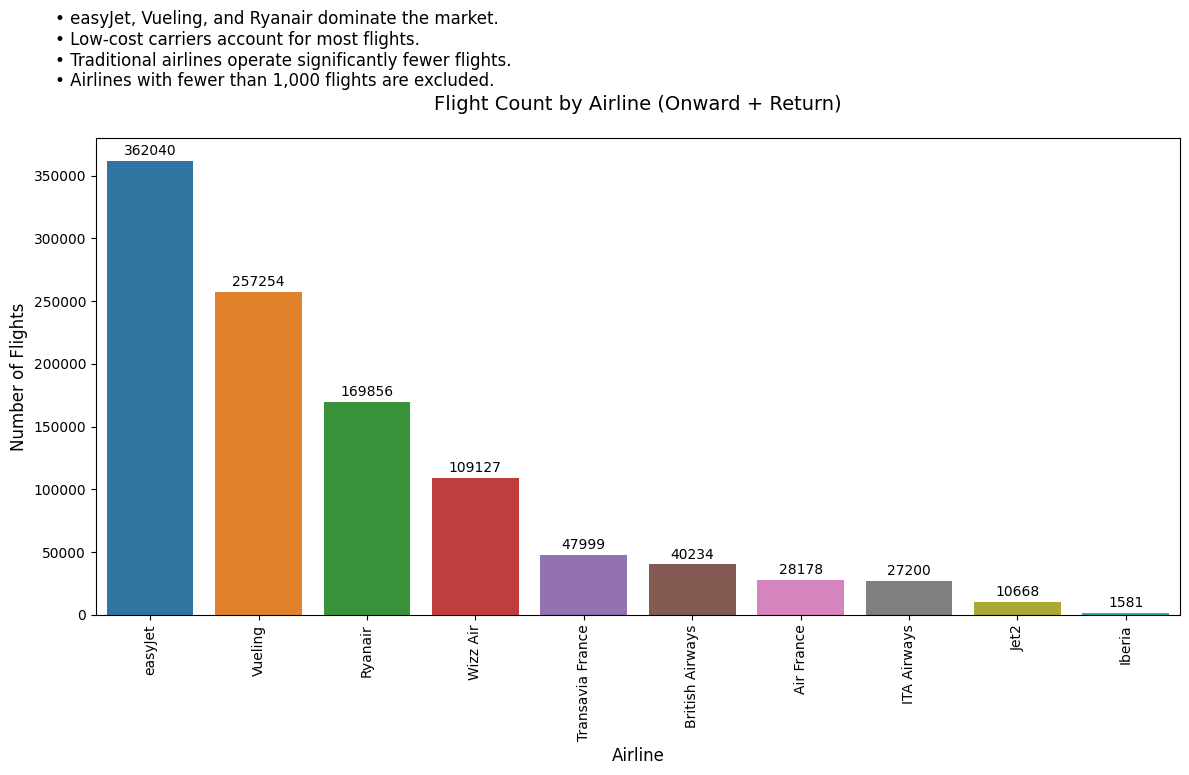

In [53]:
# Create a temporary DataFrame containing all airlines from both onward and return flights
airlines_df = pd.DataFrame({
    'Airline': pd.concat([data_copy['Onward Airlines'], data_copy['Return Airlines']], ignore_index=True)
})

# Count the number of flights for each airline
airline_counts = airlines_df['Airline'].value_counts()

# Filter airlines with at least 1,000 flights
min_flights = 1000
top_airlines = airline_counts[airline_counts > min_flights].index

# Keep only airlines that meet the threshold
filtered_data = airlines_df[airlines_df['Airline'].isin(top_airlines)]

# Create a bar chart - number of flights per airline
fig, ax = plt.subplots(figsize=(12, 7))
sns.countplot(data=filtered_data, x="Airline", palette="tab10", order=top_airlines, ax=ax)

# Add flight counts on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                xytext=(0, 7), 
                textcoords='offset points',
                ha='center', va='center')

# Add conclusions above the title
conclusions = (
    "• easyJet, Vueling, and Ryanair dominate the market.\n"
    "• Low-cost carriers account for most flights.\n"
    "• Traditional airlines operate significantly fewer flights.\n"
    "• Airlines with fewer than 1,000 flights are excluded."
)

# Adjusts the figure to make space for the text and places the text at the left side
plt.subplots_adjust(top=1.2)  # Adjusts the figure to make space for the text
plt.figtext(0.05, 1.1, conclusions, fontsize=12, ha='left', va='top')

# Customize titles and labels
plt.title("Flight Count by Airline (Onward + Return)", fontsize=14, pad=20)  # Slightly smaller padding for better spacing
plt.xlabel("Airline", fontsize=12)
plt.ylabel("Number of Flights", fontsize=12)
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


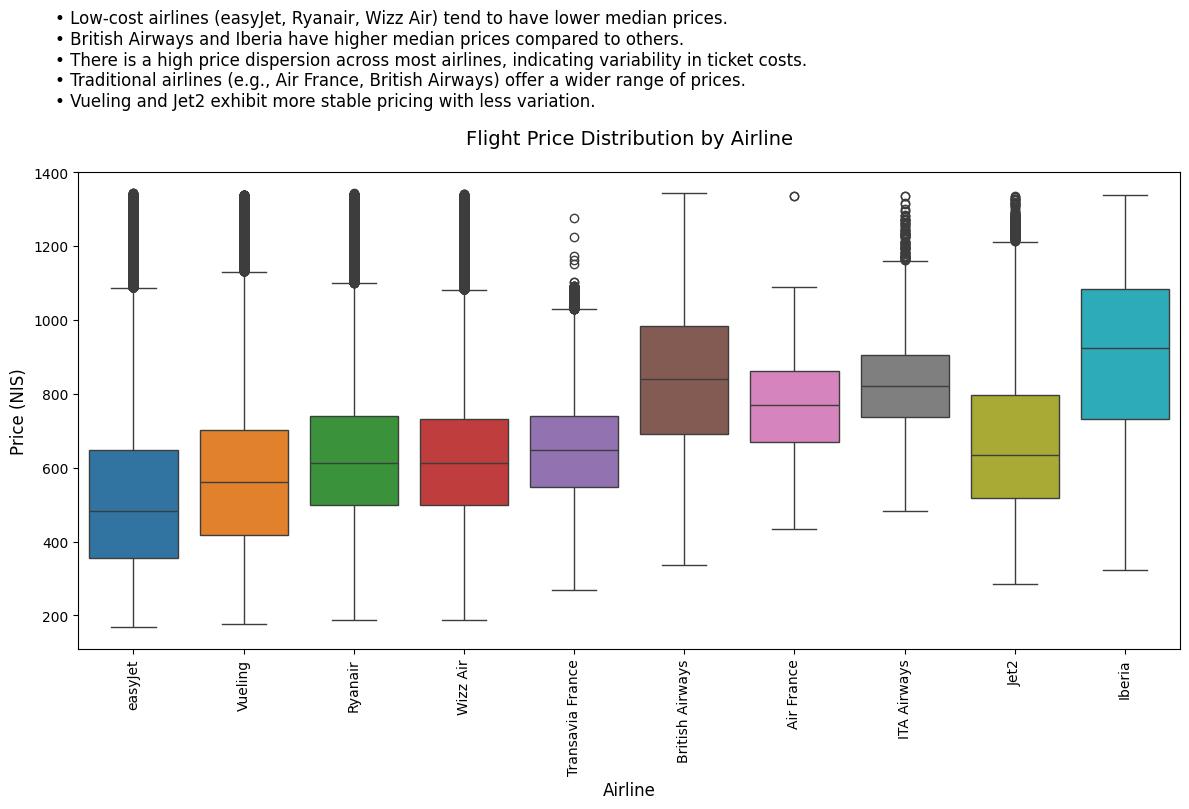

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame with flight prices for both onward and return flights
price_df = pd.concat([
    data_copy[['Onward Airlines', 'Price(NIS)']],
    data_copy[['Return Airlines', 'Price(NIS)']].rename(columns={'Return Airlines': 'Onward Airlines'})
], ignore_index=True)

# Filter airlines with at least 1,000 flights
price_df = price_df[price_df['Onward Airlines'].isin(top_airlines)]

# Create a box plot to show flight price distribution by airline
fig, ax = plt.subplots(figsize=(12, 7))
sns.boxplot(data=price_df, x="Onward Airlines", y="Price(NIS)", palette="tab10", order=top_airlines, ax=ax)

# Customize titles and labels
plt.title("Flight Price Distribution by Airline", fontsize=14, pad=20)
plt.xlabel("Airline", fontsize=12)
plt.ylabel("Price (NIS)", fontsize=12)
plt.xticks(rotation=90)

# Add conclusions above the title
conclusions = (
    "• Low-cost airlines (easyJet, Ryanair, Wizz Air) tend to have lower median prices.\n"
    "• British Airways and Iberia have higher median prices compared to others.\n"
    "• There is a high price dispersion across most airlines, indicating variability in ticket costs.\n"
    "• Traditional airlines (e.g., Air France, British Airways) offer a wider range of prices.\n"
    "• Vueling and Jet2 exhibit more stable pricing with less variation."
)

# Adjust the figure to create space for the text
plt.subplots_adjust(top=1.2)
plt.figtext(0.05, 1.15, conclusions, fontsize=12, ha='left', va='top')

plt.tight_layout()
plt.show()


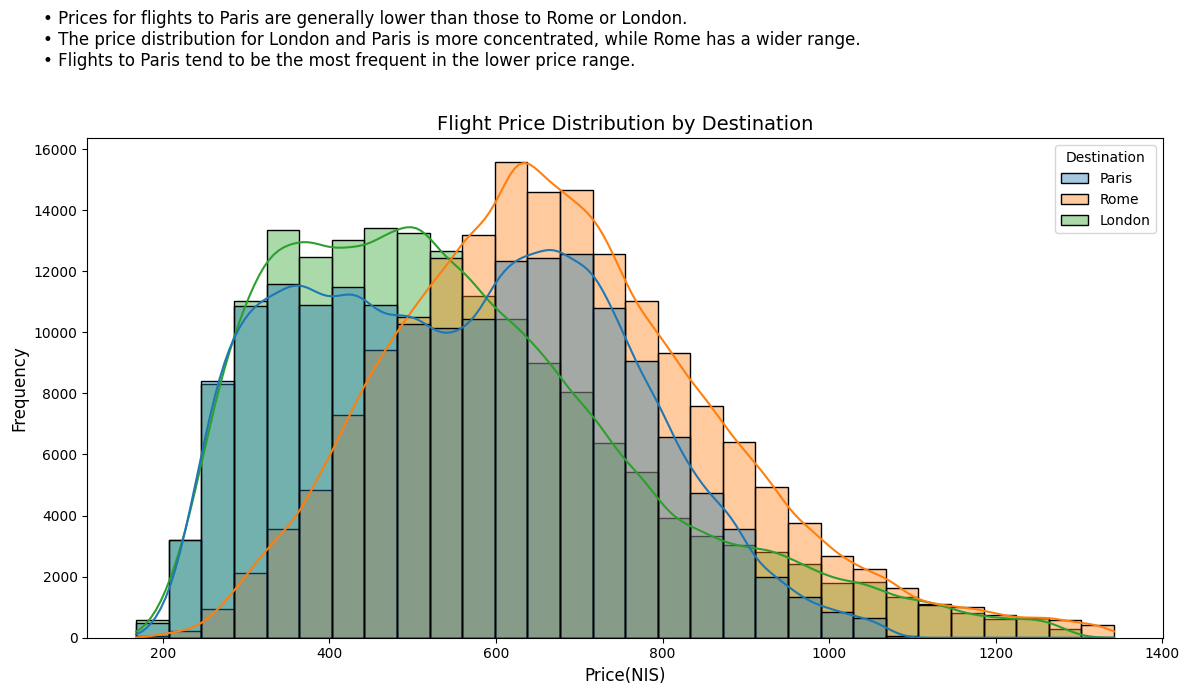

In [55]:
# 1. Create a histogram of flight prices by destination
plt.figure(figsize=(12, 6))
sns.histplot(data=data_copy, x="Price(NIS)", hue="Destination", bins=30, kde=True, palette="tab10", alpha=0.4)

# 2. Set the title and labels for the histogram
plt.title("Flight Price Distribution by Destination", fontsize=14)
plt.xlabel("Price(NIS)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

# 3. Add conclusions above the title
conclusions = (
    "• Prices for flights to Paris are generally lower than those to Rome or London.\n"
    "• The price distribution for London and Paris is more concentrated, while Rome has a wider range.\n"
    "• Flights to Paris tend to be the most frequent in the lower price range."
)

# Adjusts the figure to make space for the conclusions
plt.subplots_adjust(top=0.85)  # Adjusts the figure to make space for the text
plt.figtext(0.04, 1.15, conclusions, fontsize=12, ha='left', va='top')

# 4. Display the plot
plt.tight_layout()
plt.show()


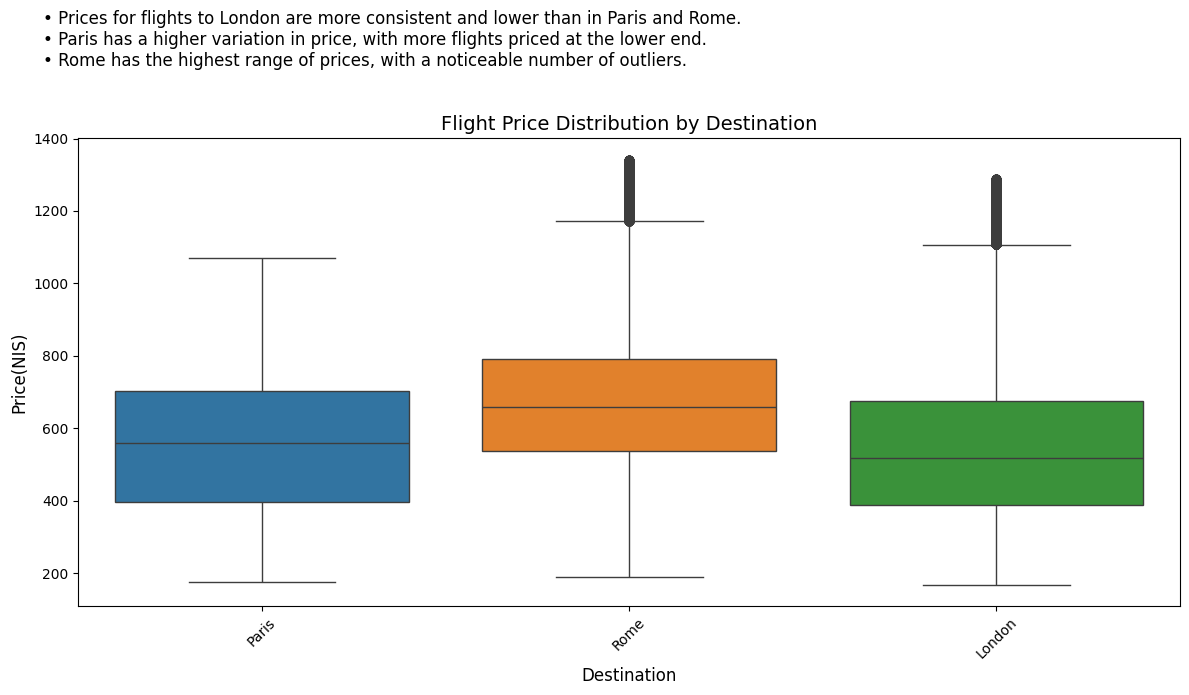

In [56]:
# Create the boxplot for flight prices by destination
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_copy, x="Destination", y="Price(NIS)", palette="tab10")

plt.title("Flight Price Distribution by Destination", fontsize=14)
plt.xlabel("Destination", fontsize=12)
plt.ylabel("Price(NIS)", fontsize=12)

# Adding conclusions above the title
conclusions = (
    "• Prices for flights to London are more consistent and lower than in Paris and Rome.\n"
    "• Paris has a higher variation in price, with more flights priced at the lower end.\n"
    "• Rome has the highest range of prices, with a noticeable number of outliers."
)

# Adjust the figure to make space for the conclusions
plt.subplots_adjust(top=0.85)
plt.figtext(0.04, 1.15, conclusions, fontsize=12, ha='left', va='top')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [57]:
data_copy.columns

Index(['Origin', 'Destination', 'TTT', 'LOS', 'Arrival Time',
       'Return Arrival Time', 'Onward Departure Airport',
       'Onward Arrival Airport', 'Return Departure Airport',
       'Return Arrival Airport', 'Onward Airlines', 'Return Airlines',
       'Onward Flight Connections', 'Onward Connection Duration(min)',
       'Onward Flight Connection Airport', 'Return Flight Connections',
       'Return Connection Duration(min)', 'Return Flight Connection Airport',
       'Carry-ons', 'Checked Bags', 'Price(NIS)', 'Snapshot Date', 'Site',
       'Total Onward Flight Duration(min)',
       'Total Return Flight Duration(min)', 'Departure Month', 'Departure Day',
       'Departure Weekday', 'Return Month', 'Return Day', 'Return Weekday',
       'Departure Time Category Num', 'Return Time Category Num',
       'Is Weekend Flight', 'Onward Departure Airport Distance',
       'Onward Arrival Airport Distance', 'Return Departure Airport Distance',
       'Return Arrival Airport Distance', 

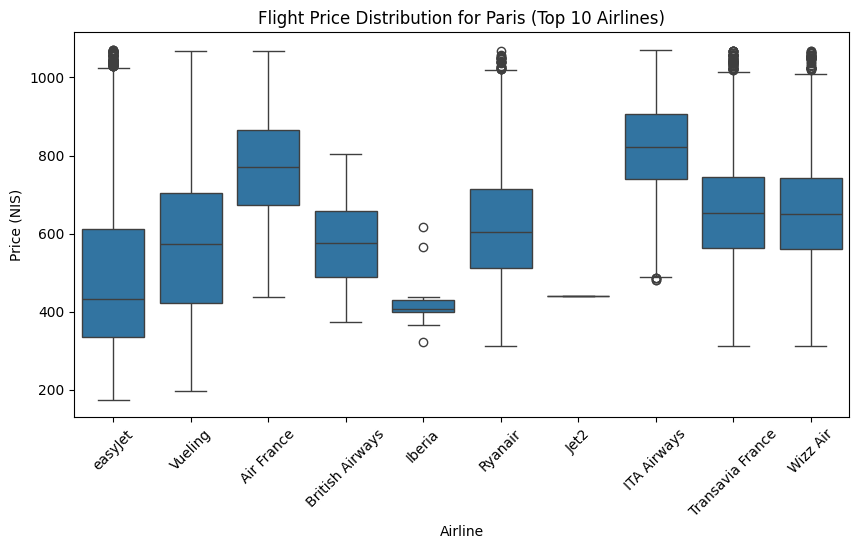

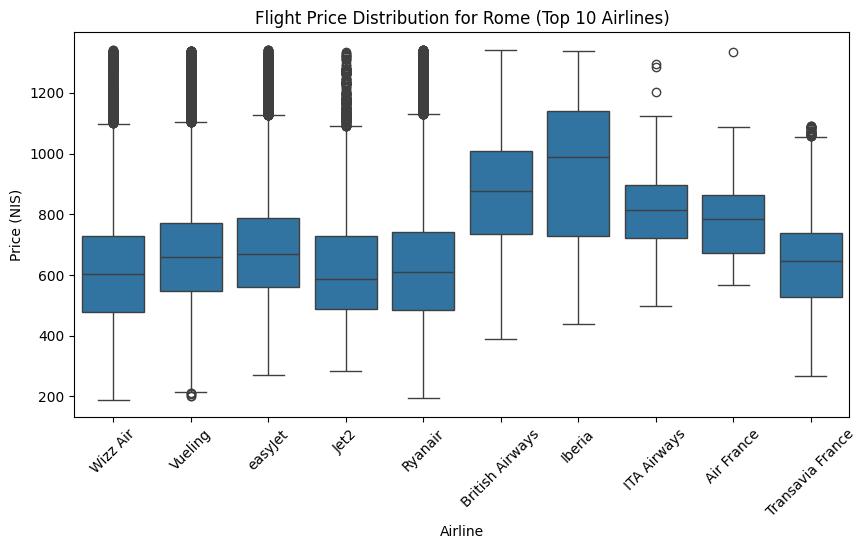

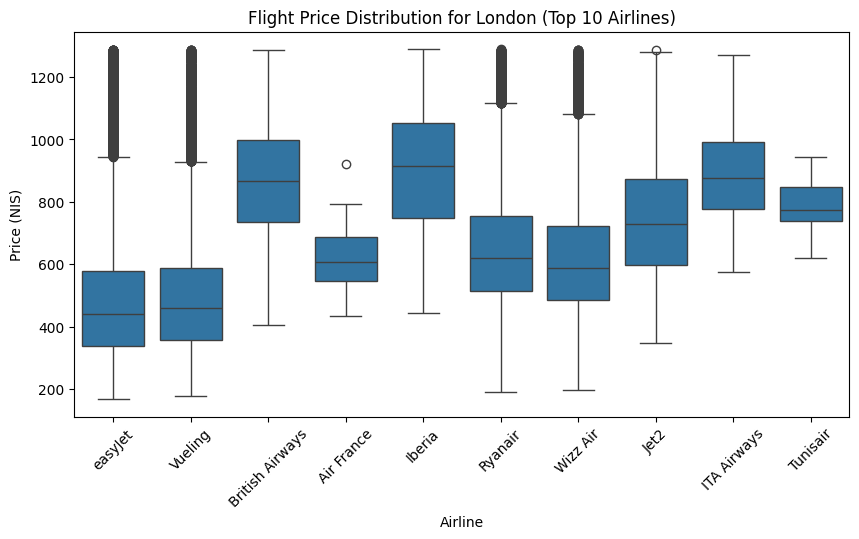

In [58]:
# יצירת גרף נפרד לכל יעד
for destination in data_copy['Destination'].unique():
    plt.figure(figsize=(10, 5))
    subset = data_copy[data_copy['Destination'] == destination]
    
    # בחירת 10 חברות התעופה העיקריות
    top_airlines = subset['Onward Airlines'].value_counts().nlargest(10).index
    subset = subset[subset['Onward Airlines'].isin(top_airlines)]
    
    sns.boxplot(x='Onward Airlines', y='Price(NIS)', data=subset)
    plt.xticks(rotation=45)
    plt.title(f'Flight Price Distribution for {destination} (Top 10 Airlines)')
    plt.xlabel('Airline')
    plt.ylabel('Price (NIS)')
    plt.show()


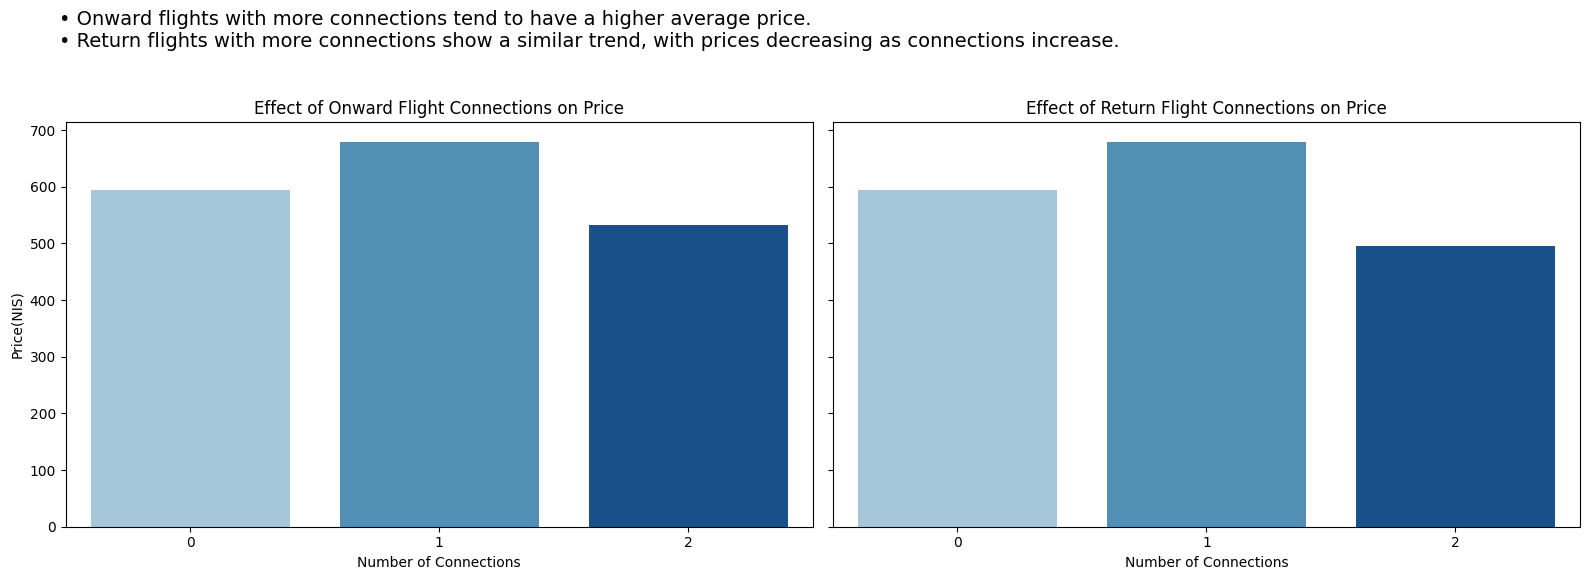

In [59]:
# Create a single figure with two side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 5), sharey=True)

# Shared color palette for onward and return flights
shared_palette = ["#9ecae1", "#4292c6", "#08519c"]  # Shades of blue

# Plot for the number of connections in onward flights
sns.barplot(data=data_copy, x='Onward Flight Connections', y='Price(NIS)', 
            estimator='mean', ax=axes[0], palette=shared_palette, errorbar=None)
axes[0].set_xlabel("Number of Connections")
axes[0].set_title("Effect of Onward Flight Connections on Price")

# Plot for the number of connections in return flights
sns.barplot(data=data_copy, x='Return Flight Connections', y='Price(NIS)', 
            estimator='mean', ax=axes[1], palette=shared_palette, errorbar=None)
axes[1].set_xlabel("Number of Connections")
axes[1].set_title("Effect of Return Flight Connections on Price")

# Add conclusions above the title
conclusions = (
    "• Onward flights with more connections tend to have a higher average price.\n"
    "• Return flights with more connections show a similar trend, with prices decreasing as connections increase."
)

# Add the conclusions as text inside the plot
plt.subplots_adjust(top=0.85)  # Adjust the figure to make space for the text
plt.figtext(0.04, 1.15, conclusions, fontsize=14, ha='left', va='top')

# Improve the layout of the plot
plt.tight_layout()
plt.show()

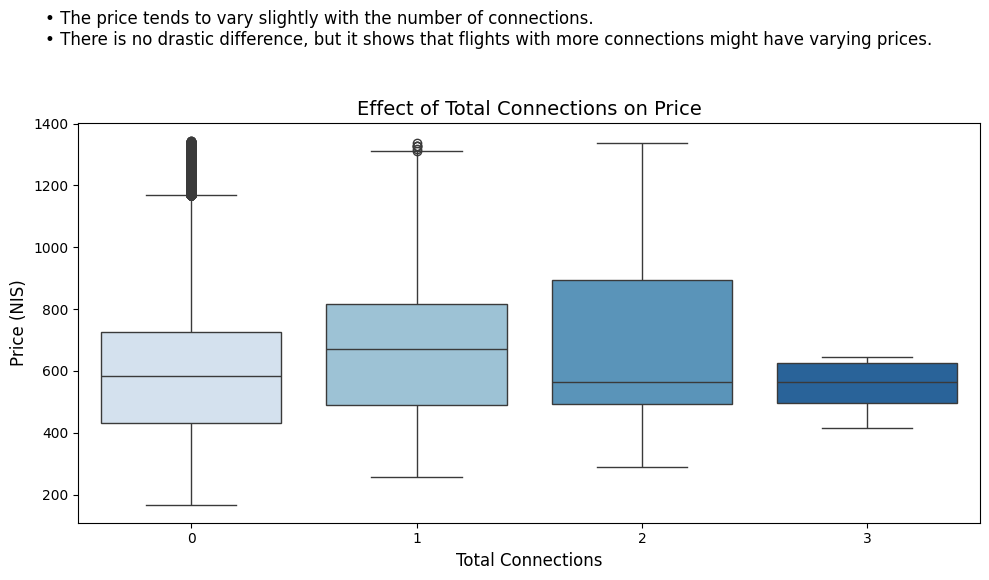

In [60]:
# Create the plot for Total Connections vs Price
plt.figure(figsize=(10, 5))

# Creating a boxplot to show the distribution of prices based on the number of total connections
sns.boxplot(data=data_copy, x='Total Connections', y='Price(NIS)', palette='Blues')

plt.title('Effect of Total Connections on Price', fontsize=14)
plt.xlabel('Total Connections', fontsize=12)
plt.ylabel('Price (NIS)', fontsize=12)

# Adding conclusions as text above the graph, aligned to the left
conclusions = (
    "• The price tends to vary slightly with the number of connections.\n"
    "• There is no drastic difference, but it shows that flights with more connections might have varying prices."
)
plt.figtext(0.05, 1.15, conclusions, ha="left", va="top", fontsize=12, color="black")

plt.tight_layout()
plt.show()

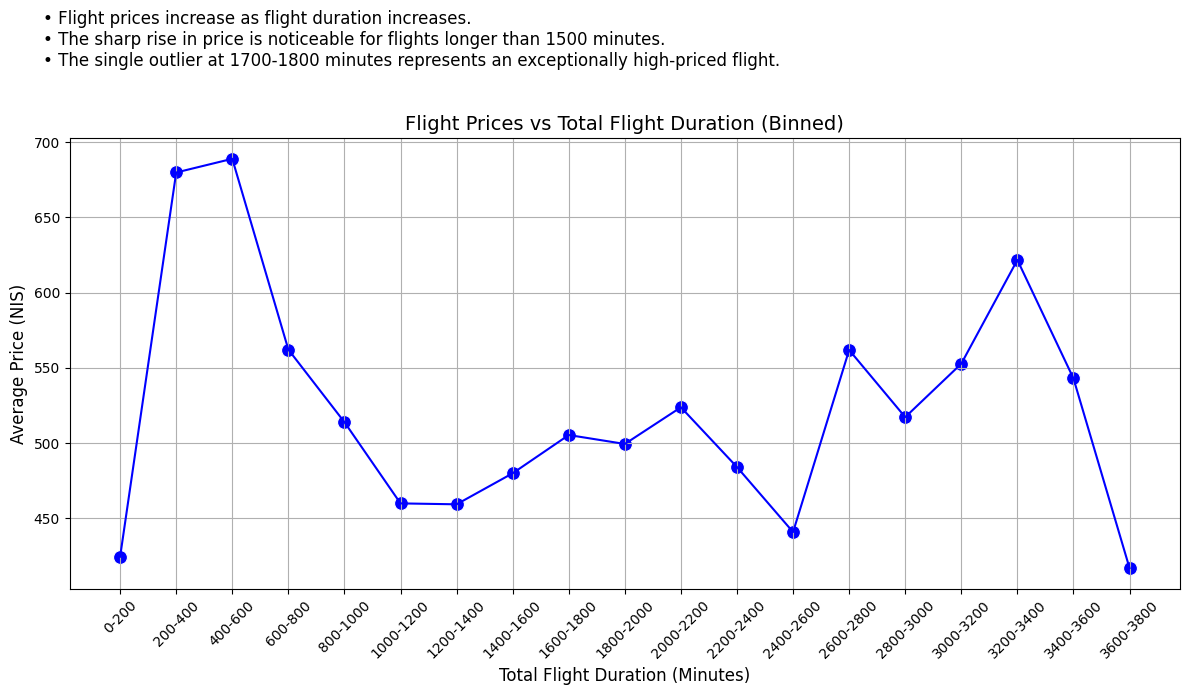

In [61]:
# Create flight duration bins (fixed interval of 100 minutes)
bins = np.arange(0, data_copy['Total Flight Duration(min)'].max() + 200, 200)
labels = [f"{int(bins[i])}-{int(bins[i+1])}" for i in range(len(bins)-1)]
data_copy['Flight Duration Binned'] = pd.cut(data_copy['Total Flight Duration(min)'], bins=bins, labels=labels, include_lowest=True)

# Calculate the average price for each flight duration bin
avg_price_per_duration = data_copy.groupby('Flight Duration Binned')['Price(NIS)'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.scatterplot(data=avg_price_per_duration, x='Flight Duration Binned', y='Price(NIS)', color='blue', s=100)
plt.plot(avg_price_per_duration['Flight Duration Binned'], avg_price_per_duration['Price(NIS)'], linestyle='-', color='blue')


plt.title("Flight Prices vs Total Flight Duration (Binned)", fontsize=14)
plt.xlabel("Total Flight Duration (Minutes)", fontsize=12)
plt.ylabel("Average Price (NIS)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)

# Add conclusions above the title
conclusions = (
    "• Flight prices increase as flight duration increases.\n"
    "• The sharp rise in price is noticeable for flights longer than 1500 minutes.\n"
    "• The single outlier at 1700-1800 minutes represents an exceptionally high-priced flight."
)

# Adjusts the figure to make space for the text
plt.subplots_adjust(top=0.85)  # Adjusts the figure to make space for the text
plt.figtext(0.04, 1.15, conclusions, fontsize=12, ha='left', va='top')

plt.tight_layout()
plt.show()



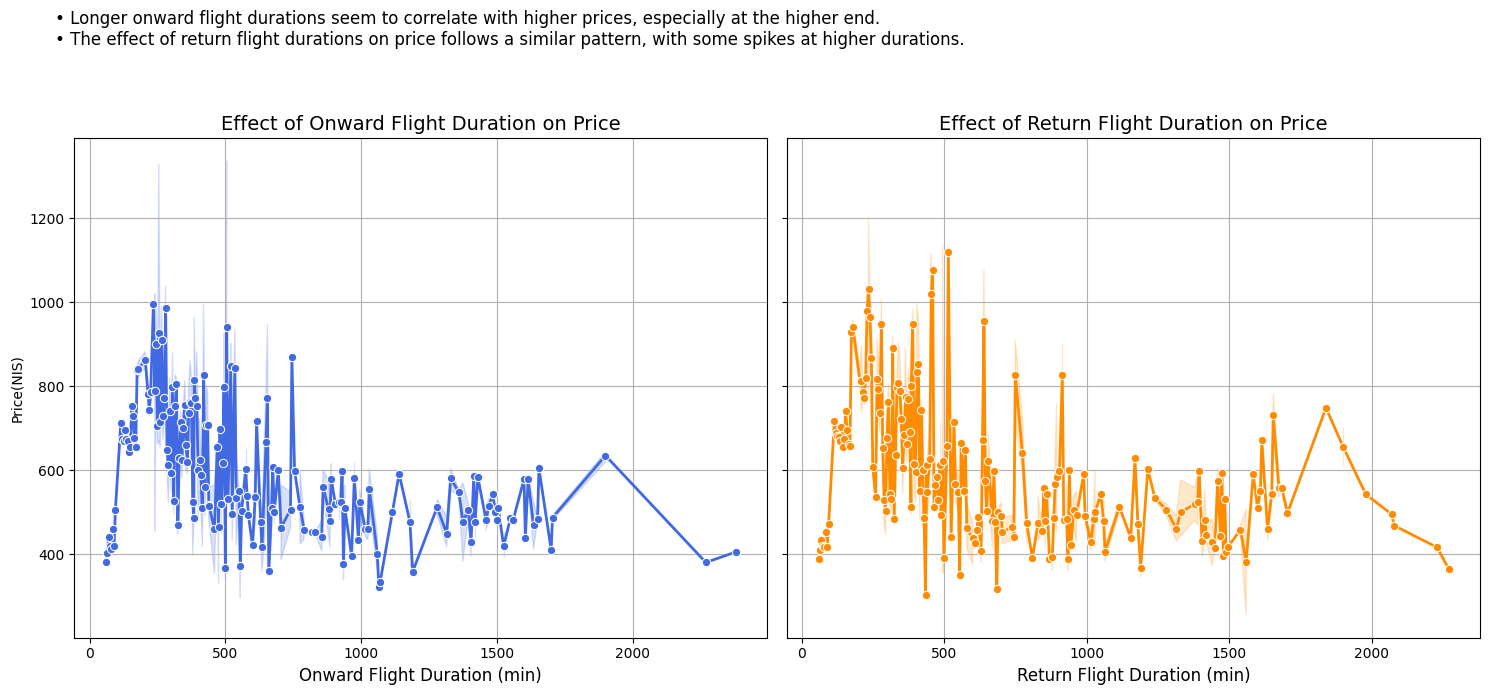

In [62]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)
color_onward = "royalblue"
color_return = "darkorange"

# Plot for onward flight duration
sns.lineplot(data=data_copy, x='Total Onward Flight Duration(min)', y='Price(NIS)', 
             marker="o", markersize=6, linewidth=2, color=color_onward, ax=axes[0])
axes[0].set_xlabel("Onward Flight Duration (min)", fontsize=12)
axes[0].set_title("Effect of Onward Flight Duration on Price", fontsize=14)
axes[0].grid(True)

# Plot for return flight duration
sns.lineplot(data=data_copy, x='Total Return Flight Duration(min)', y='Price(NIS)', 
             marker="o", markersize=6, linewidth=2, color=color_return, ax=axes[1])
axes[1].set_xlabel("Return Flight Duration (min)", fontsize=12)
axes[1].set_title("Effect of Return Flight Duration on Price", fontsize=14)
axes[1].grid(True)


fig.subplots_adjust(left=0.1, right=0.95, wspace=0.3)

# Add conclusions above the title
conclusions = (
    "• Longer onward flight durations seem to correlate with higher prices, especially at the higher end.\n"
    "• The effect of return flight durations on price follows a similar pattern, with some spikes at higher durations."
)

# Add the conclusions as text inside the plot
plt.subplots_adjust(top=0.85)  # Adjust the figure to make space for the text
plt.figtext(0.04, 1.15, conclusions, fontsize=12, ha='left', va='top')

plt.tight_layout()
plt.show()


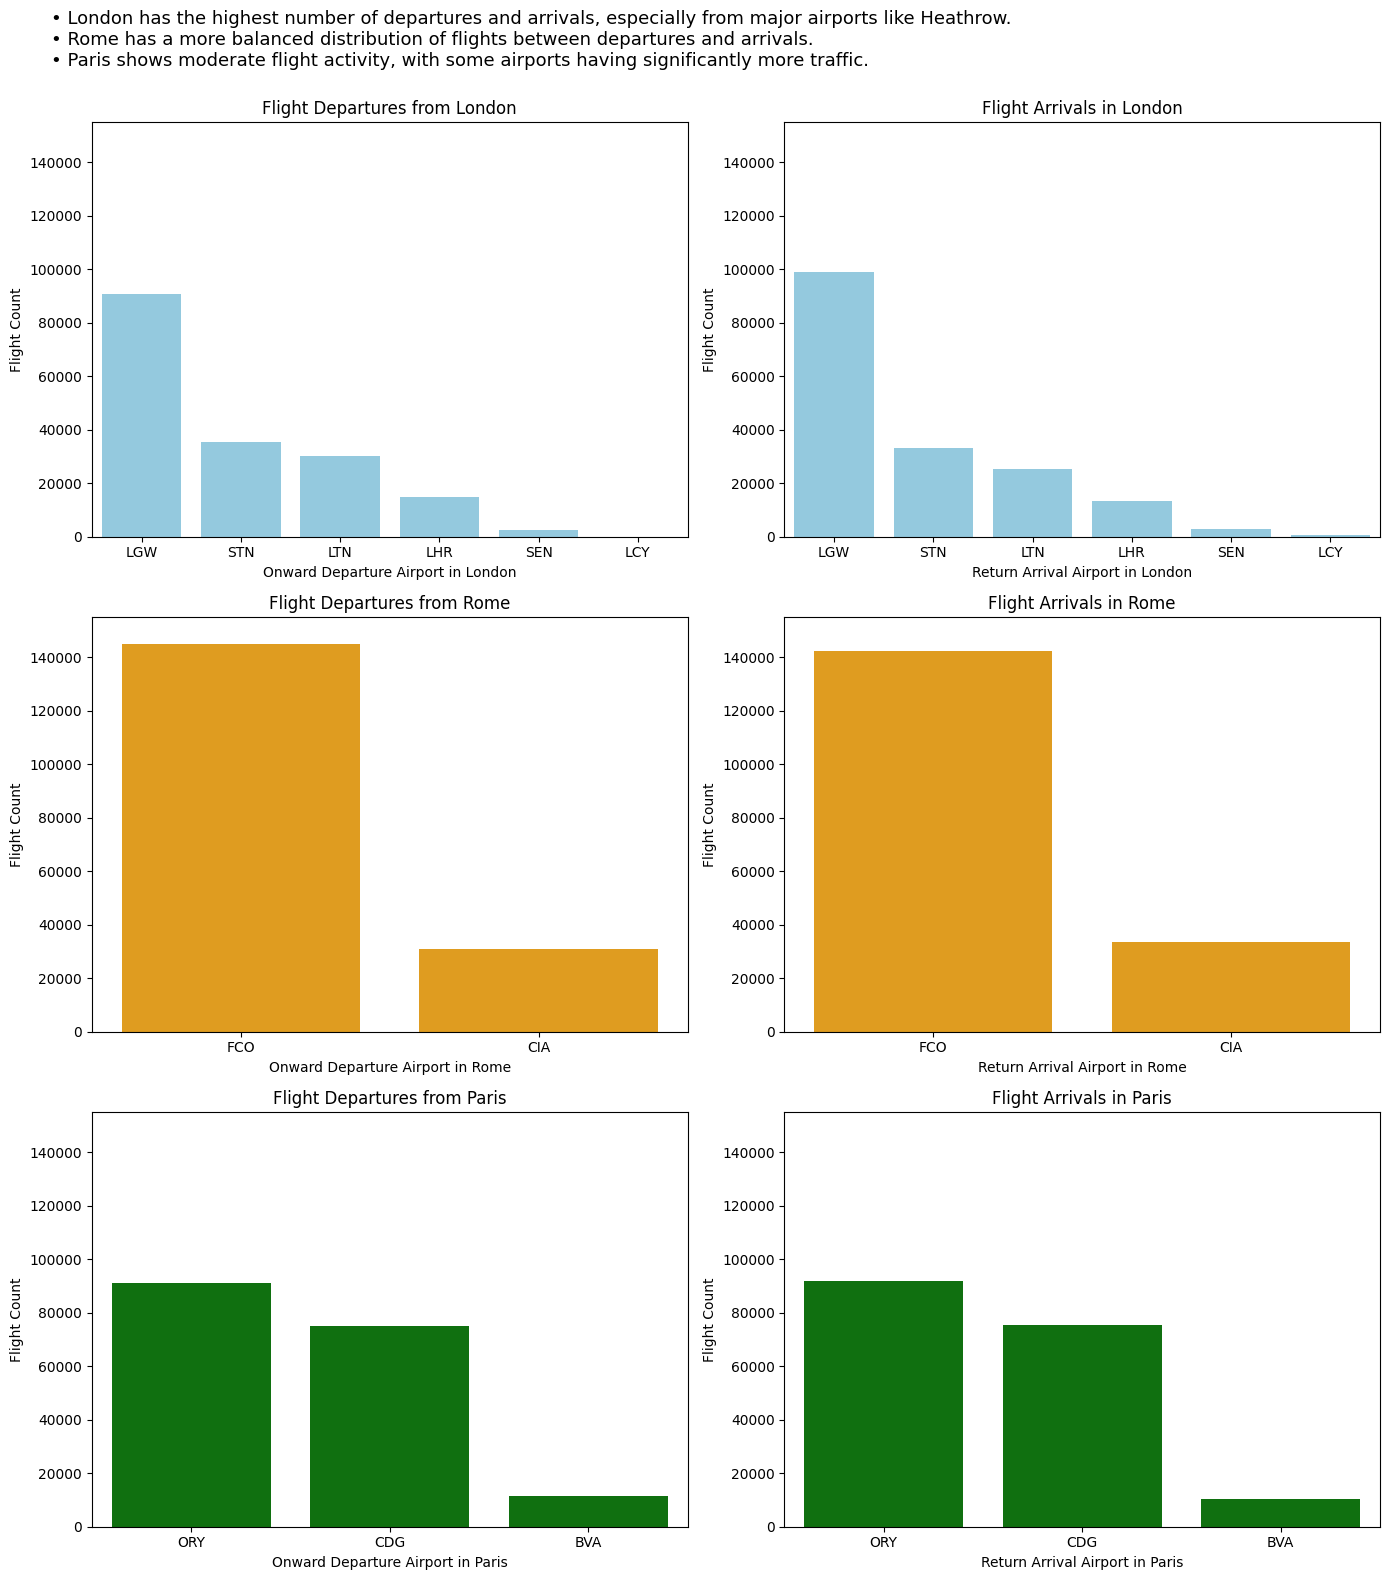

In [63]:
# Airport lists
london_airports = ['LHR', 'LGW', 'STN', 'LTN', 'LCY', 'SEN']
rome_airports = ['FCO', 'CIA']
paris_airports = ['CDG', 'ORY', 'BVA']

# Create a figure with 6 plots (3 rows, 2 columns)
fig, axes = plt.subplots(3, 2, figsize=(14, 15))

# Function to create a bar plot
def create_bar_plot(data, city, airport_col, title, ax, color):
    # Filter data based on the city and airport column
    subset_data = data_copy[data_copy[airport_col].isin(city)]
    # Count the number of flights for each airport
    flight_counts = subset_data[airport_col].value_counts().reset_index()
    flight_counts.columns = [airport_col, 'Flight Count']
    # Create the bar plot with color
    sns.barplot(data=flight_counts, x=airport_col, y='Flight Count', ax=ax, color=color)
    ax.set_title(title)
    ax.set_xlabel(f"{airport_col} in {title.split()[-1]}")
    ax.set_ylabel("Flight Count")
    return flight_counts['Flight Count'].max() if not flight_counts.empty else 0

# List to store maximum values of flight counts
max_values = []

# Define colors for each city
colors = {
    'London': 'skyblue',
    'Rome': 'orange',
    'Paris': 'green'
}

# Create plots and collect maximum values for the Y-axis
max_values.append(create_bar_plot(data_copy[data_copy['Origin'] == 'London'], london_airports, 'Onward Departure Airport', 'Flight Departures from London', axes[0, 0], colors['London']))
max_values.append(create_bar_plot(data_copy[data_copy['Destination'] == 'London'], london_airports, 'Return Arrival Airport', 'Flight Arrivals in London', axes[0, 1], colors['London']))

max_values.append(create_bar_plot(data_copy[data_copy['Origin'] == 'Rome'], rome_airports, 'Onward Departure Airport', 'Flight Departures from Rome', axes[1, 0], colors['Rome']))
max_values.append(create_bar_plot(data_copy[data_copy['Destination'] == 'Rome'], rome_airports, 'Return Arrival Airport', 'Flight Arrivals in Rome', axes[1, 1], colors['Rome']))

max_values.append(create_bar_plot(data_copy[data_copy['Origin'] == 'Paris'], paris_airports, 'Onward Departure Airport', 'Flight Departures from Paris', axes[2, 0], colors['Paris']))
max_values.append(create_bar_plot(data_copy[data_copy['Destination'] == 'Paris'], paris_airports, 'Return Arrival Airport', 'Flight Arrivals in Paris', axes[2, 1], colors['Paris']))

# Set a unified Y-axis limit for all plots
y_max = max(max_values)
for ax in axes.flatten():
    ax.set_ylim(0, y_max+10000)

# Add conclusions above the title
conclusions = (
    "• London has the highest number of departures and arrivals, especially from major airports like Heathrow.\n"
    "• Rome has a more balanced distribution of flights between departures and arrivals.\n"
    "• Paris shows moderate flight activity, with some airports having significantly more traffic."
)

# Add the conclusions as text inside the plot
plt.subplots_adjust(top=0.85)  # Adjust the figure to make space for the text
plt.figtext(0.04, 1.05, conclusions, fontsize=13, ha='left', va='top')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


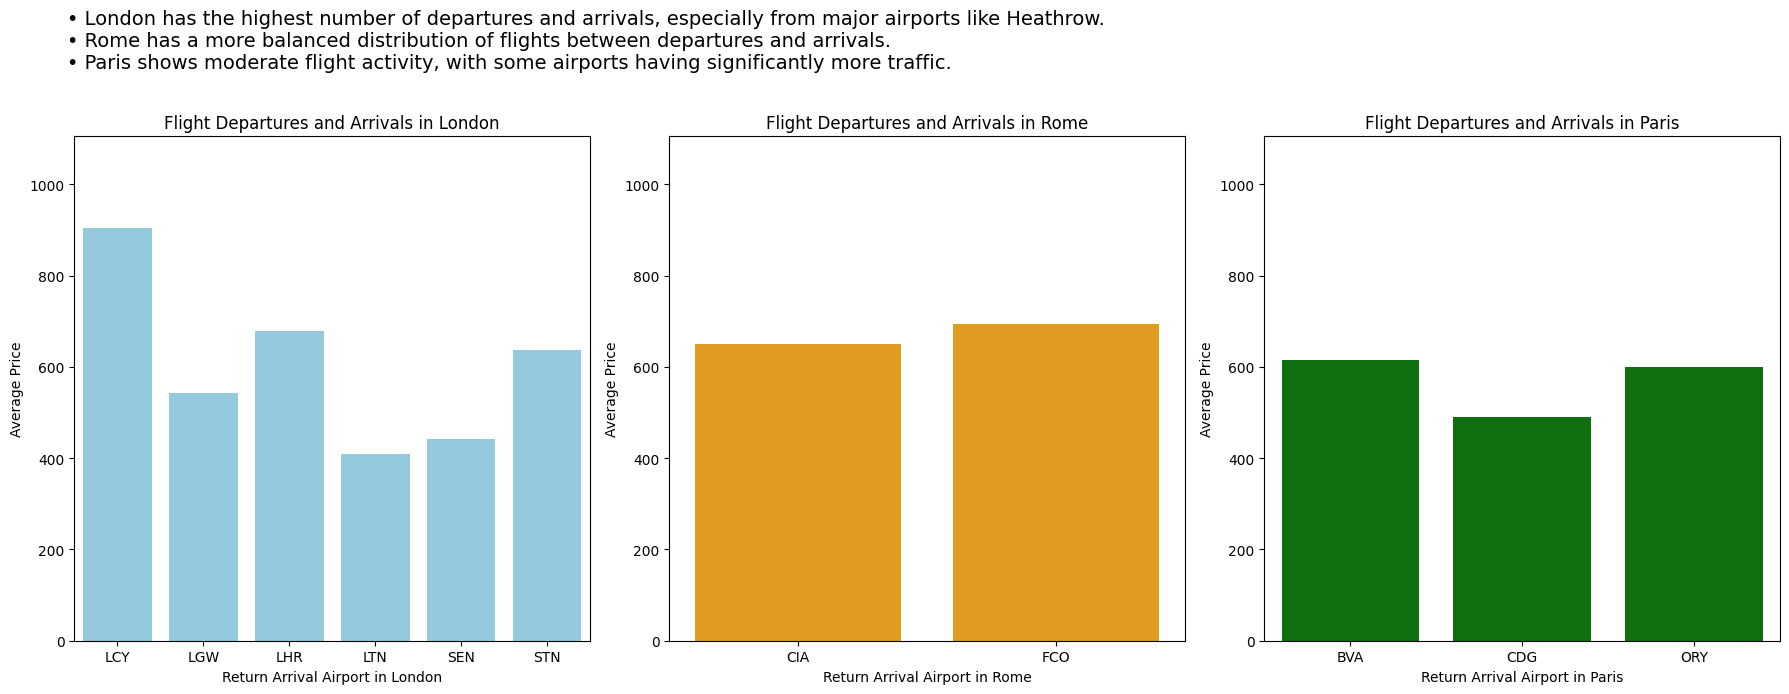

In [64]:
# Airport lists
london_airports = ['LHR', 'LGW', 'STN', 'LTN', 'LCY', 'SEN']
rome_airports = ['FCO', 'CIA']
paris_airports = ['CDG', 'ORY', 'BVA']

# Set a unified Y-axis limit
max_price = data_copy['Price(NIS)'].max()

# Create a figure with 3 plots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Function to create a bar plot with average price
def create_bar_plot(data, city, airport_col, title, ax, color):
    # Filter data based on the city and airport column
    valid_airports = [airport for airport in city if airport not in ['PAR', 'ROM']]
    subset_data = data_copy[data_copy[airport_col].isin(valid_airports)]
    
    # Check if there is data
    if subset_data.empty:
        print(f"⚠️ No data available for {title}")
        ax.set_title(f"{title} (No Data)")
        ax.set_xticks([])  # Hide X-axis ticks when no data is available
        return 0  # Return 0 when no data is found

    # Calculate the average price per airport
    avg_prices = subset_data.groupby(airport_col).agg({'Price(NIS)': 'mean'}).reset_index()

    # Create the bar plot
    sns.barplot(data=avg_prices, x=airport_col, y='Price(NIS)', ax=ax, color=color)
    ax.set_title(title)
    ax.set_xlabel(f"{airport_col} in {title.split()[-1]}")
    ax.set_ylabel("Average Price")
    ax.set_ylim(0, max_price)

    return avg_prices['Price(NIS)'].max()  # Return the maximum price

# List to store maximum values of average prices
max_values = []

# Define colors for each city
colors = {
    'London': 'skyblue',
    'Rome': 'orange',
    'Paris': 'green'
}

# Create the plots and collect the maximum values for the Y-axis
max_values.append(create_bar_plot(data_copy[data_copy['Origin'] == 'London'], london_airports, 'Onward Departure Airport', 'Flight Departures and Arrivals in London', axes[0], colors['London']))
max_values.append(create_bar_plot(data_copy[data_copy['Destination'] == 'London'], london_airports, 'Return Arrival Airport', 'Flight Departures and Arrivals in London', axes[0], colors['London']))

max_values.append(create_bar_plot(data_copy[data_copy['Origin'] == 'Rome'], rome_airports, 'Onward Departure Airport', 'Flight Departures and Arrivals in Rome', axes[1], colors['Rome']))
max_values.append(create_bar_plot(data_copy[data_copy['Destination'] == 'Rome'], rome_airports, 'Return Arrival Airport', 'Flight Departures and Arrivals in Rome', axes[1], colors['Rome']))

max_values.append(create_bar_plot(data_copy[data_copy['Origin'] == 'Paris'], paris_airports, 'Onward Departure Airport', 'Flight Departures and Arrivals in Paris', axes[2], colors['Paris']))
max_values.append(create_bar_plot(data_copy[data_copy['Destination'] == 'Paris'], paris_airports, 'Return Arrival Airport', 'Flight Departures and Arrivals in Paris', axes[2], colors['Paris']))

# Set a unified Y-axis limit for all plots
max_values = [x for x in max_values if x != 0]  # Remove 0 values caused by no data
y_max = max(max_values) if max_values else 0
for ax in axes.flatten():
    ax.set_ylim(0, y_max + 200)  # Adjust this value based on the data

# Add conclusions above the title
conclusions = (
    "• London has the highest number of departures and arrivals, especially from major airports like Heathrow.\n"
    "• Rome has a more balanced distribution of flights between departures and arrivals.\n"
    "• Paris shows moderate flight activity, with some airports having significantly more traffic."
)

# Add the conclusions as text inside the plot
plt.subplots_adjust(top=0.85)  # Adjust the figure to make space for the text
plt.figtext(0.04, 1.15, conclusions, fontsize=14, ha='left', va='top')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


In [65]:
# # Select relevant numeric columns for correlation analysis
# numeric_columns = ['Price(NIS)', 'Total Flight Duration(min)', 'Total Onward Flight Duration(min)',
#                    'Total Return Flight Duration(min)', 'Carry-ons', 'Departure Month', 'Checked Bags',
#                    'Total Connections', 'Onward Flight Connections', 'Return Flight Connections',
#                    'Return Month', 'Departure Weekday', 'Onward Connection Duration(min)',
#                    'Return Connection Duration(min)', 'LOS', 'Departure Time Category Num',
#                    'Return Time Category Num', 'Return Weekday', 'Return Departure Airport Distance',
#                    'TTT', 'Return Arrival Airport Distance', 'Onward Arrival Airport Distance',
#                    'Return Day', 'Onward Departure Airport Distance', 'Departure Day']

# subset_data = data_copy[numeric_columns]

# # Create multiple rows of subplots for better readability
# fig, axes = plt.subplots(nrows=len(numeric_columns[1:])//3 + 1, ncols=3, figsize=(20, 30))
# axes = axes.flatten()

# for i, column in enumerate(numeric_columns[1:]):
#     sns.scatterplot(x=subset_data[column], y=subset_data['Price(NIS)'], alpha=0.5, ax=axes[i])
#     sns.lineplot(x=subset_data[column], y=subset_data['Price(NIS)'], color='red', alpha=0.6, ax=axes[i])
#     axes[i].set_title(f"Price vs {column}")
#     axes[i].set_xlabel(column)
#     axes[i].set_ylabel("Price (NIS)")

# plt.suptitle("Correlation between numeric variables and flight price", fontsize=16)
# plt.tight_layout()
# plt.show()


שונות נמוכה מאוד – הנתונים כמעט אחידים ולכן קשה לראות מגמות.
קורלציה נמוכה – אין קשר חזק בין המשתנים הללו למחיר.
הסקלה של הנתונים בעייתית – אם הנתונים קטנים או גדולים מאוד, הפיזור לא ברור.

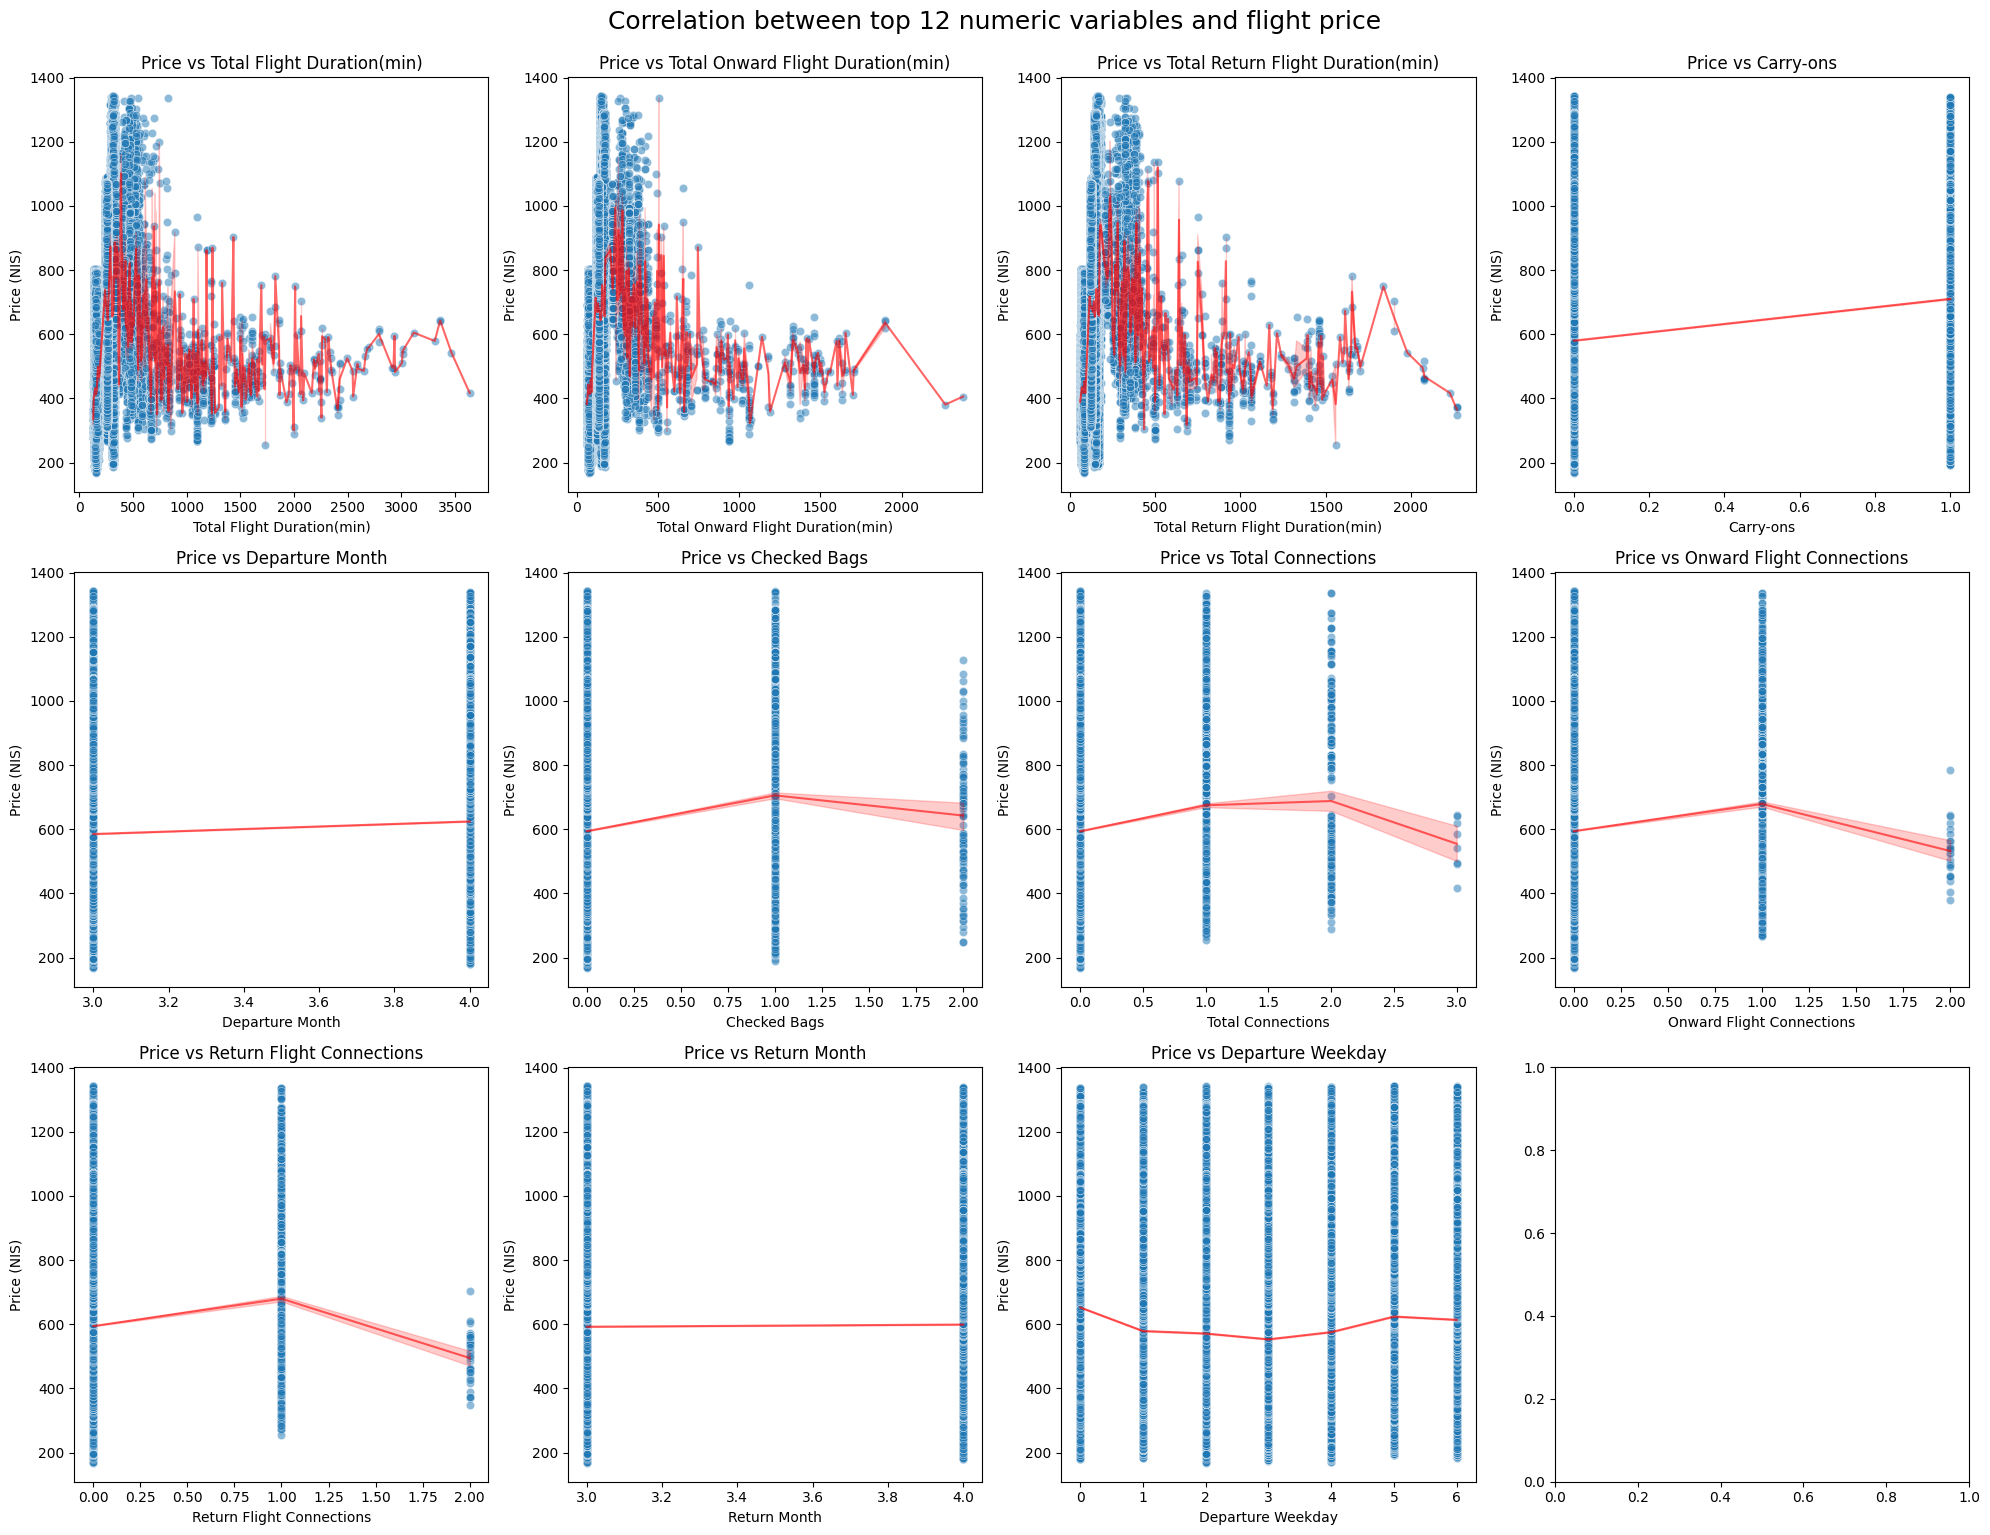

In [66]:
# Select the top 12 variables with the highest correlation to Price(NIS)
top_correlated_columns = ['Total Flight Duration(min)', 'Total Onward Flight Duration(min)',
                          'Total Return Flight Duration(min)', 'Carry-ons', 'Departure Month',
                          'Checked Bags', 'Total Connections', 'Onward Flight Connections',
                          'Return Flight Connections', 'Return Month', 'Departure Weekday']

subset_data = data_copy[['Price(NIS)'] + top_correlated_columns]

# Create a figure with multiple subplots (3 rows, 4 columns)
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))
axes = axes.flatten()

for i, column in enumerate(top_correlated_columns):
    sns.scatterplot(x=subset_data[column], y=subset_data['Price(NIS)'], alpha=0.5, ax=axes[i])
    sns.lineplot(x=subset_data[column], y=subset_data['Price(NIS)'], color='red', alpha=0.6, ax=axes[i])
    axes[i].set_title(f"Price vs {column}")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Price (NIS)")

# Adjust layout for better readability
plt.tight_layout()
plt.suptitle("Correlation between top 12 numeric variables and flight price", fontsize=18, y=1.02)
plt.show()


# Exploratory Data Analysis (EDA) - the impact of different features on flight price

In this section, we visualize the impact of different features on flight price.  
We will explore how various factors influence the pricing patterns, helping us understand the key drivers behind the price prediction.


Correlation between numeric variables and flight price:
Price(NIS)                           1.000000
Total Flight Duration(min)           0.439293
Total Onward Flight Duration(min)    0.409827
Total Return Flight Duration(min)    0.386589
Carry-ons                            0.198557
Departure Month                      0.081097
Checked Bags                         0.039901
Total Connections                    0.038113
Onward Flight Connections            0.027944
Return Flight Connections            0.027640
Return Month                         0.015533
Departure Weekday                   -0.000305
Onward Connection Duration(min)     -0.001828
Return Connection Duration(min)     -0.002180
LOS                                 -0.004541
Departure Time Category Num         -0.018463
Return Time Category Num            -0.042170
Return Weekday                      -0.042786
Return Departure Airport Distance   -0.061253
TTT                                 -0.062268
Return Arrival Airport D

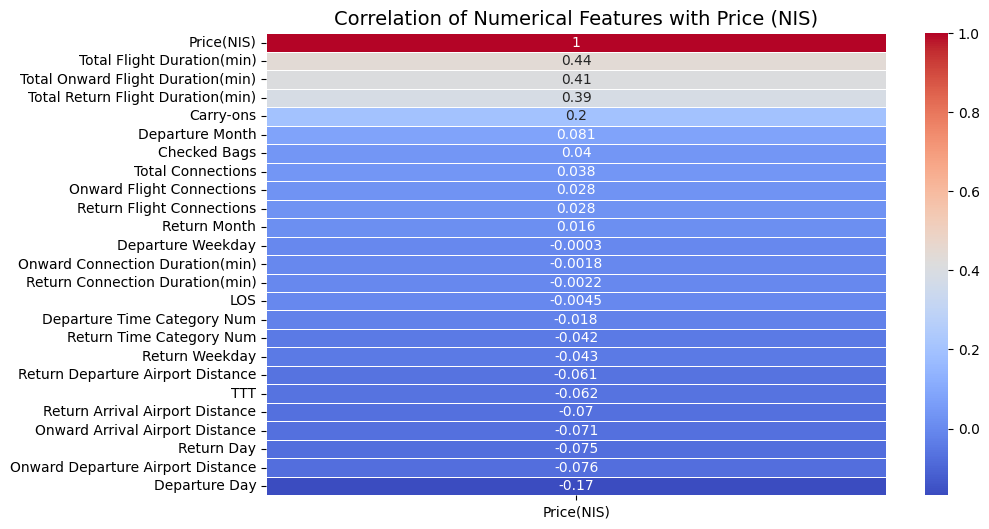

In [67]:
# Selecting only numeric columns
numeric_data = data_copy.select_dtypes(include=['number'])

# Printing correlation of all numeric variables with flight price
print("Correlation between numeric variables and flight price:")
correlation_with_price = numeric_data.corr()['Price(NIS)'].sort_values(ascending=False)
print(correlation_with_price)

# Visualizing the correlation using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_data.corr()[['Price(NIS)']].sort_values(by='Price(NIS)', ascending=False), 
            annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation of Numerical Features with Price (NIS)", fontsize=14)
plt.show()


📌 Correlation between numeric variables and flight price:
Price(NIS)                           1.000000
Total Flight Duration(min)           0.439293
Total Onward Flight Duration(min)    0.409827
Total Return Flight Duration(min)    0.386589
Carry-ons                            0.198557
Departure Month                      0.081097
Checked Bags                         0.039901
Total Connections                    0.038113
Onward Flight Connections            0.027944
Return Flight Connections            0.027640
Return Month                         0.015533
Departure Weekday                   -0.000305
Onward Connection Duration(min)     -0.001828
Return Connection Duration(min)     -0.002180
LOS                                 -0.004541
Departure Time Category Num         -0.018463
Return Time Category Num            -0.042170
Return Weekday                      -0.042786
Return Departure Airport Distance   -0.061253
TTT                                 -0.062268
Return Arrival Airport

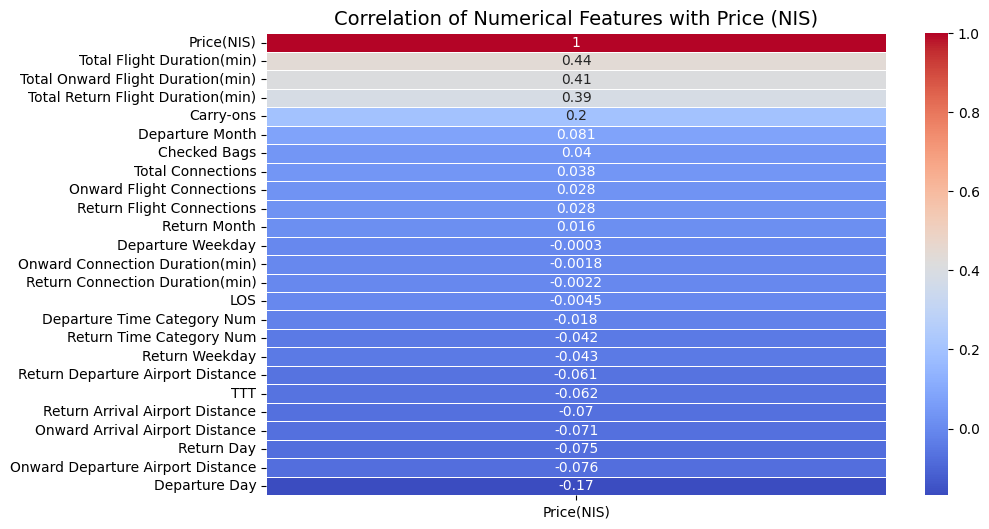

In [68]:
# Selecting only numeric columns
numeric_data = data_copy.select_dtypes(include=['number'])

# Removing constant columns (columns with only one unique value)
numeric_data = numeric_data.loc[:, numeric_data.nunique() > 1]

# Printing correlation of all numeric variables with flight price
print("📌 Correlation between numeric variables and flight price:")
correlation_with_price = numeric_data.corr()['Price(NIS)'].sort_values(ascending=False)
print(correlation_with_price)

# Visualizing the correlation using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_data.corr()[['Price(NIS)']].sort_values(by='Price(NIS)', ascending=False), 
            annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation of Numerical Features with Price (NIS)", fontsize=14)
plt.show()

### Conclusions from Correlation Analysis:

- **Total Onward Flight Duration** and **Total Return Flight Duration** show the highest positive correlation with flight price.
- **Carry-ons** also have a moderate positive correlation, indicating higher prices for flights with carry-ons.
- **Departure Month** and **Return Month** slightly influence prices.
- **Departure Day** and **airport distances** (Return Departure/Arrival) show negative correlations, suggesting lower prices for shorter distances.

#### Top 10 Features Influencing Flight Price:
1. `Total Onward Flight Duration (min)` - 0.379121
2. `Total Return Flight Duration (min)` - 0.353908
3. `Carry-ons` - 0.206509
4. `Departure Month` - 0.100534
5. `Checked Bags` - 0.036403
6. `Is Weekend Flight` - 0.034819
7. `Return Month` - 0.034536
8. `Total Connections` - 0.034115
9. `Onward Flight Connections` - 0.027141
10. `Return Flight Connections` - 0.022639


C:\Users\galha\AppData\Local\Temp\ipykernel_16392\2581427196.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(["No Carry on", "1 Carry on"])
C:\Users\galha\AppData\Local\Temp\ipykernel_16392\2581427196.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(["No Bag", "1 Bag", "2 Bags"])


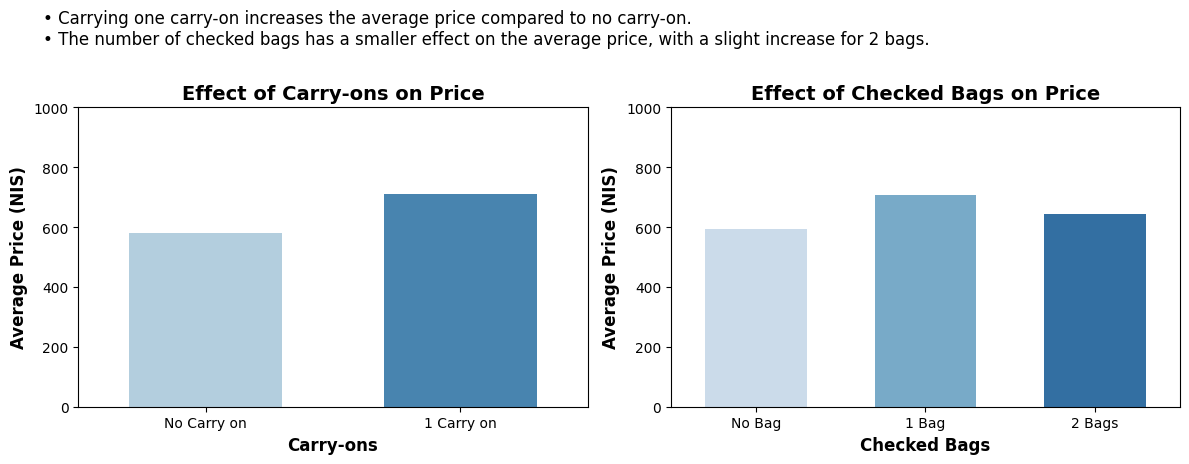

In [69]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

palette_carryons = sns.color_palette("Blues", n_colors=2)
palette_checkedbags = sns.color_palette("Blues", n_colors=3)

# Plot for Carry-ons
sns.barplot(data=data_copy, x='Carry-ons', y='Price(NIS)', ax=axes[0], palette=palette_carryons, width=0.6, ci=None)
axes[0].set_title("Effect of Carry-ons on Price", fontsize=14, fontweight="bold")
axes[0].set_xlabel("Carry-ons", fontsize=12, fontweight="bold")
axes[0].set_ylabel("Average Price (NIS)", fontsize=12, fontweight="bold")
axes[0].set_xticklabels(["No Carry on", "1 Carry on"])

# Plot for Checked Bags
sns.barplot(data=data_copy, x='Checked Bags', y='Price(NIS)', ax=axes[1], palette=palette_checkedbags, width=0.6, ci=None)
axes[1].set_title("Effect of Checked Bags on Price", fontsize=14, fontweight="bold")
axes[1].set_xlabel("Checked Bags", fontsize=12, fontweight="bold")
axes[1].set_ylabel("Average Price (NIS)", fontsize=12, fontweight="bold")
axes[1].set_xticklabels(["No Bag", "1 Bag", "2 Bags"])

# Updating the Y-axis scale for both plots to match
axes[0].set_ylim(0, 1000)
axes[1].set_ylim(0, 1000)

# Add conclusions above the title
conclusions = (
    "• Carrying one carry-on increases the average price compared to no carry-on.\n"
    "• The number of checked bags has a smaller effect on the average price, with a slight increase for 2 bags."
)
# Add the conclusions as text inside the plot
plt.subplots_adjust(top=0.85)  # Adjust the figure to make space for the text
plt.figtext(0.04, 1.15, conclusions, fontsize=12, ha='left', va='top')

plt.tight_layout()
plt.show()


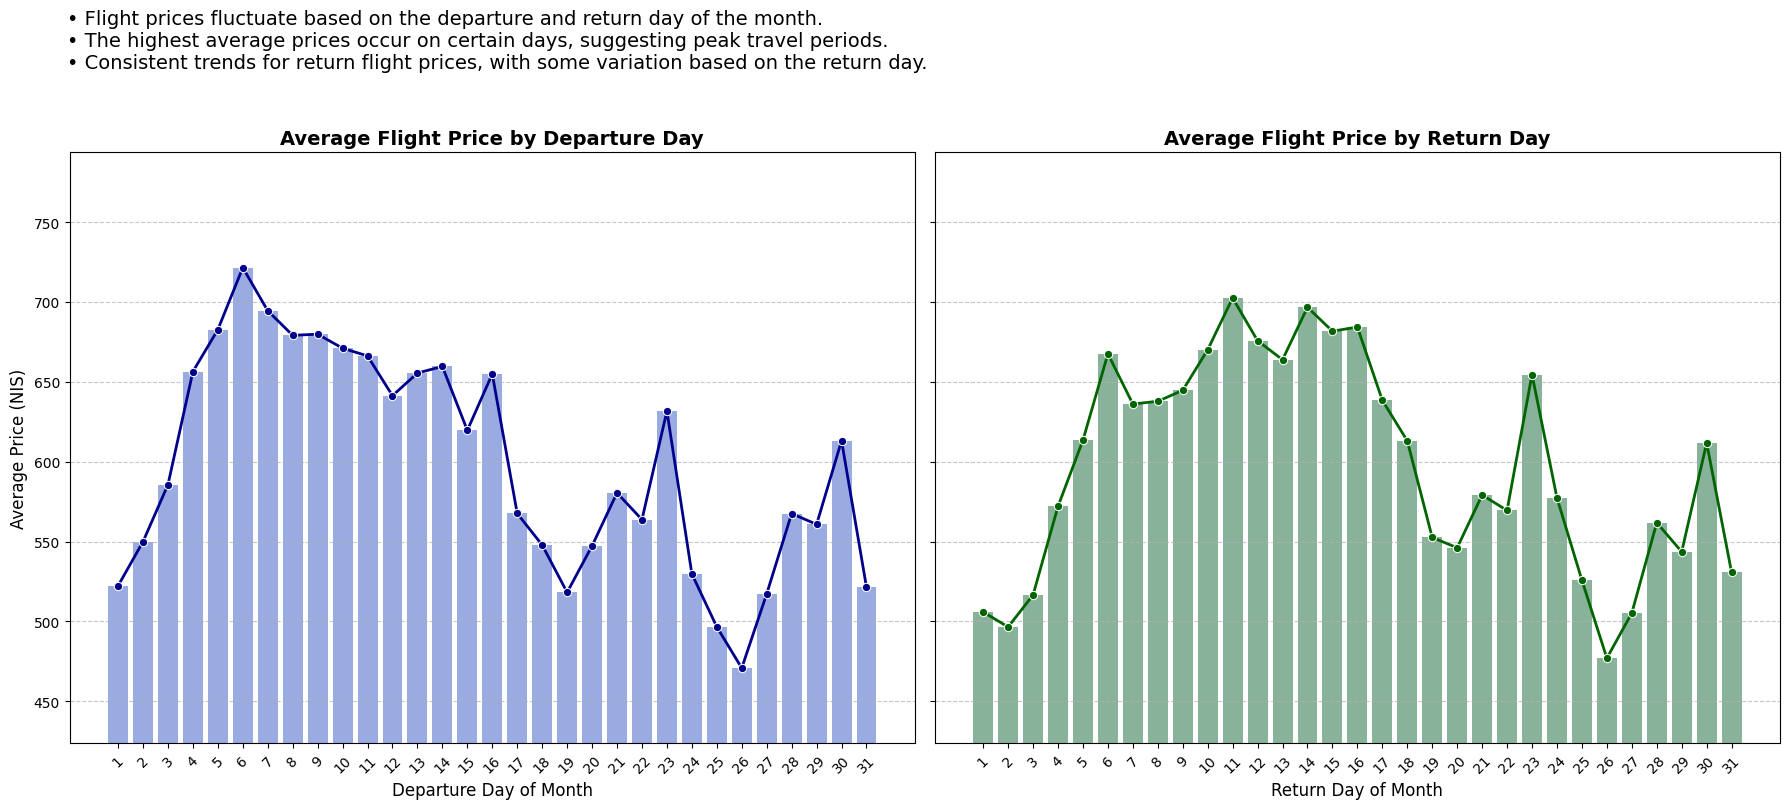

In [70]:
# Calculate average price by Departure Day and Return Day
avg_price_per_departure = data_copy.groupby('Departure Day')['Price(NIS)'].mean().reset_index()
avg_price_per_return = data_copy.groupby('Return Day')['Price(NIS)'].mean().reset_index()

# Creating indices within the DataFrame
avg_price_per_departure["Index"] = range(len(avg_price_per_departure))
avg_price_per_return["Index"] = range(len(avg_price_per_return))

# Create plots with a shared Y-axis
fig, axes = plt.subplots(1, 2, figsize=(18, 7), sharey=True)

# Setting common Y-axis limits  
y_min = min(avg_price_per_departure['Price(NIS)'].min(), avg_price_per_return['Price(NIS)'].min()) * 0.9
y_max = max(avg_price_per_departure['Price(NIS)'].max(), avg_price_per_return['Price(NIS)'].max()) * 1.1

# Departure Day plot
sns.barplot(ax=axes[0], data=avg_price_per_departure, x="Index", y="Price(NIS)", color="royalblue", alpha=0.6)
sns.lineplot(ax=axes[0], data=avg_price_per_departure, x="Index", y="Price(NIS)", color='darkblue', marker='o', linewidth=2)
axes[0].set_xticks(avg_price_per_departure["Index"])
axes[0].set_xticklabels(avg_price_per_departure["Departure Day"].astype(str), rotation=45)
axes[0].set_xlabel("Departure Day of Month", fontsize=12)
axes[0].set_ylabel("Average Price (NIS)", fontsize=12)
axes[0].set_title("Average Flight Price by Departure Day", fontsize=14, fontweight='bold')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)
axes[0].set_ylim(y_min, y_max)

# Return Day plot
sns.barplot(ax=axes[1], data=avg_price_per_return, x="Index", y="Price(NIS)", color="seagreen", alpha=0.6)
sns.lineplot(ax=axes[1], data=avg_price_per_return, x="Index", y="Price(NIS)", color='darkgreen', marker='o', linewidth=2)
axes[1].set_xticks(avg_price_per_return["Index"])
axes[1].set_xticklabels(avg_price_per_return["Return Day"].astype(str), rotation=45)
axes[1].set_xlabel("Return Day of Month", fontsize=12)
axes[1].set_title("Average Flight Price by Return Day", fontsize=14, fontweight='bold')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)
axes[1].set_ylim(y_min, y_max)

# Add conclusions above the title
conclusions = (
    "• Flight prices fluctuate based on the departure and return day of the month.\n"
    "• The highest average prices occur on certain days, suggesting peak travel periods.\n"
    "• Consistent trends for return flight prices, with some variation based on the return day."
)

# Add the conclusions as text inside the plot
plt.subplots_adjust(top=0.85)  # Adjust the figure to make space for the text
plt.figtext(0.04, 1.15, conclusions, fontsize=14, ha='left', va='top')

# Adjusting the layout of the plots
plt.tight_layout()
plt.show()


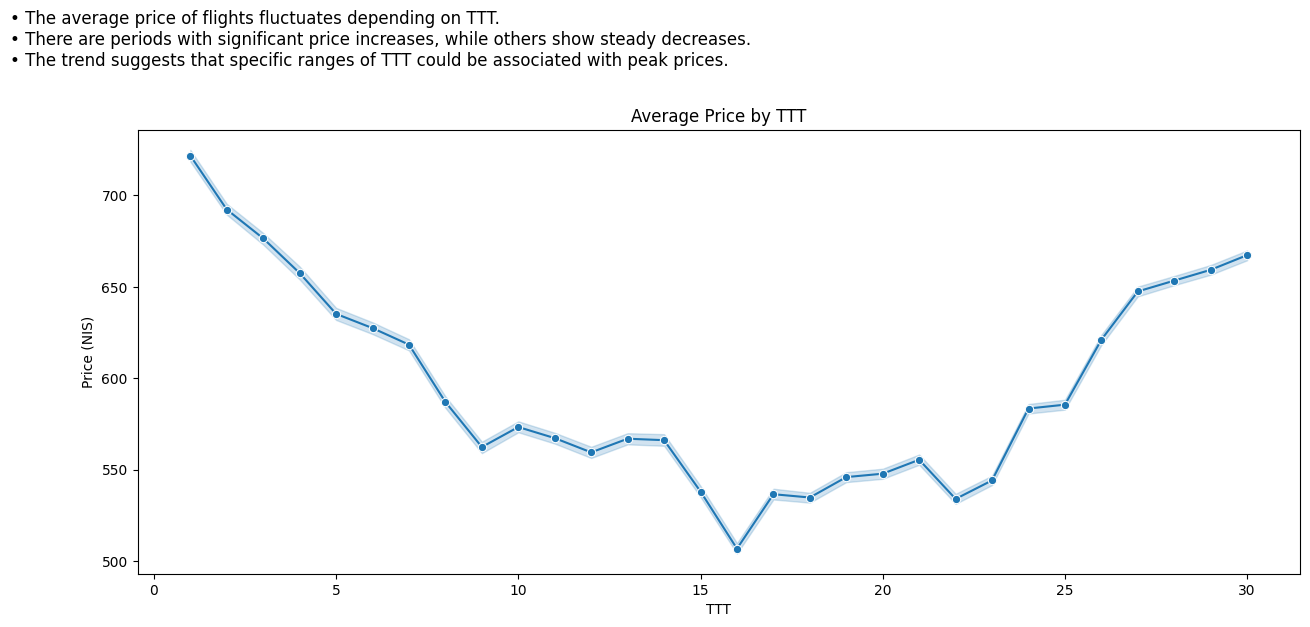

In [71]:
# Create the plot
plt.figure(figsize=(15, 6))
sns.lineplot(data=data_copy, x='TTT', y='Price(NIS)', marker="o")  # Adding points to the plot
plt.ylabel("Price (NIS)")
plt.xlabel("TTT")
plt.title("Average Price by TTT")

# Adding conclusions above the title
conclusions = (
    "• The average price of flights fluctuates depending on TTT.\n"
    "• There are periods with significant price increases, while others show steady decreases.\n"
    "• The trend suggests that specific ranges of TTT could be associated with peak prices."
)

# Add the conclusions as text inside the plot
plt.subplots_adjust(top=0.85)  # Adjust the figure to make space for the text
plt.figtext(0.04, 1.05, conclusions, fontsize=12, ha='left', va='top')

# Display the plot
plt.show()


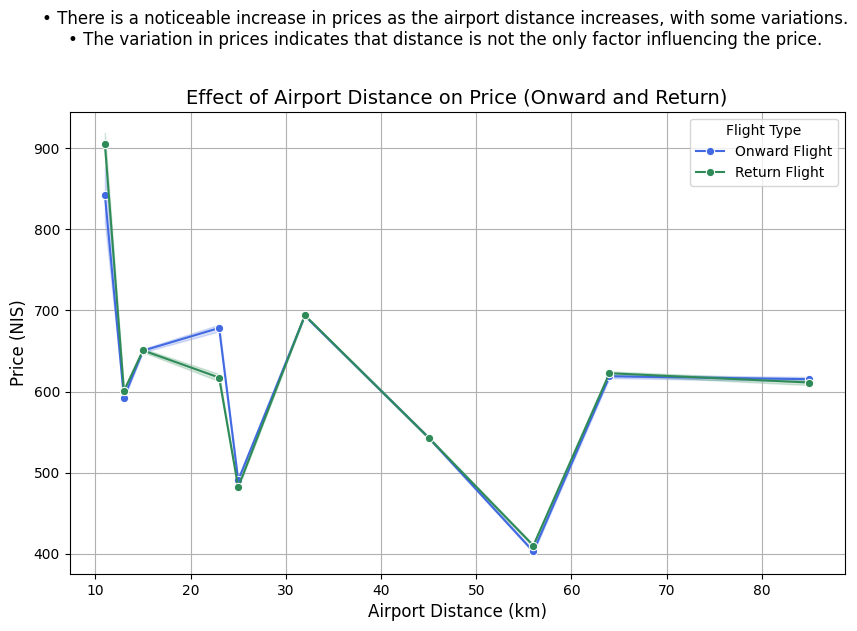

In [72]:
# Line plot for Onward and Return Airport Distance vs Price together
plt.figure(figsize=(10, 6))

# Plot for Onward Departure Airport Distance vs Price
sns.lineplot(data=data_copy, x='Onward Departure Airport Distance', y='Price(NIS)', color='royalblue', marker="o", label="Onward Flight")

# Plot for Return Arrival Airport Distance vs Price
sns.lineplot(data=data_copy, x='Return Arrival Airport Distance', y='Price(NIS)', color='seagreen', marker="o", label="Return Flight")

plt.title("Effect of Airport Distance on Price (Onward and Return)", fontsize=14)
plt.xlabel("Airport Distance (km)", fontsize=12)
plt.ylabel("Price (NIS)", fontsize=12)
plt.legend(title="Flight Type")
plt.grid(True)

# Adding conclusions as text above the graph
conclusions = (
    "• There is a noticeable increase in prices as the airport distance increases, with some variations.\n"
    "• The variation in prices indicates that distance is not the only factor influencing the price."
)
plt.figtext(0.5, 1.05, conclusions, ha="center", va="top", fontsize=12, color="black")

plt.show()


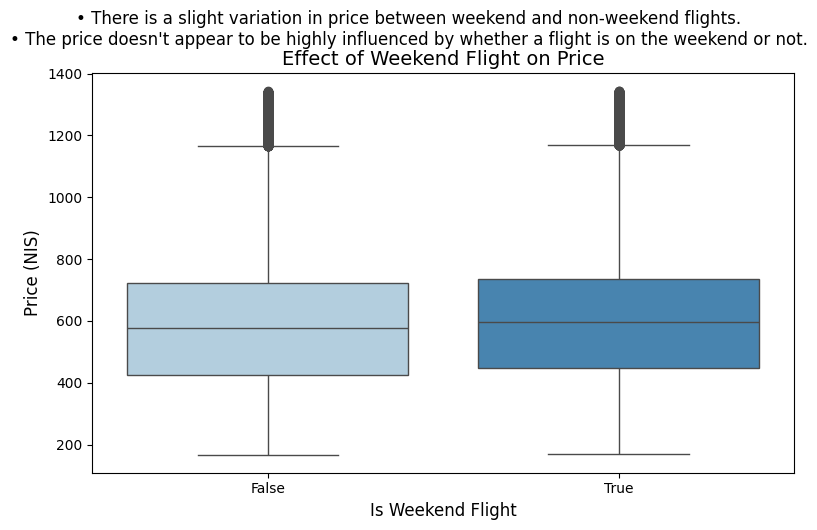

In [73]:
# Create the plot for Is Weekend Flight vs Price
plt.figure(figsize=(8, 5))

# Creating a boxplot to show the distribution of prices based on the weekend status
sns.boxplot(data=data_copy, x='Is Weekend Flight', y='Price(NIS)', palette='Blues')

plt.title('Effect of Weekend Flight on Price', fontsize=14)
plt.xlabel('Is Weekend Flight', fontsize=12)
plt.ylabel('Price (NIS)', fontsize=12)

# Adding conclusions as text above the graph
conclusions = (
    "• There is a slight variation in price between weekend and non-weekend flights.\n"
    "• The price doesn't appear to be highly influenced by whether a flight is on the weekend or not."
)
plt.figtext(0.5, 1.05, conclusions, ha="center", va="top", fontsize=12, color="black")

plt.tight_layout()
plt.show()


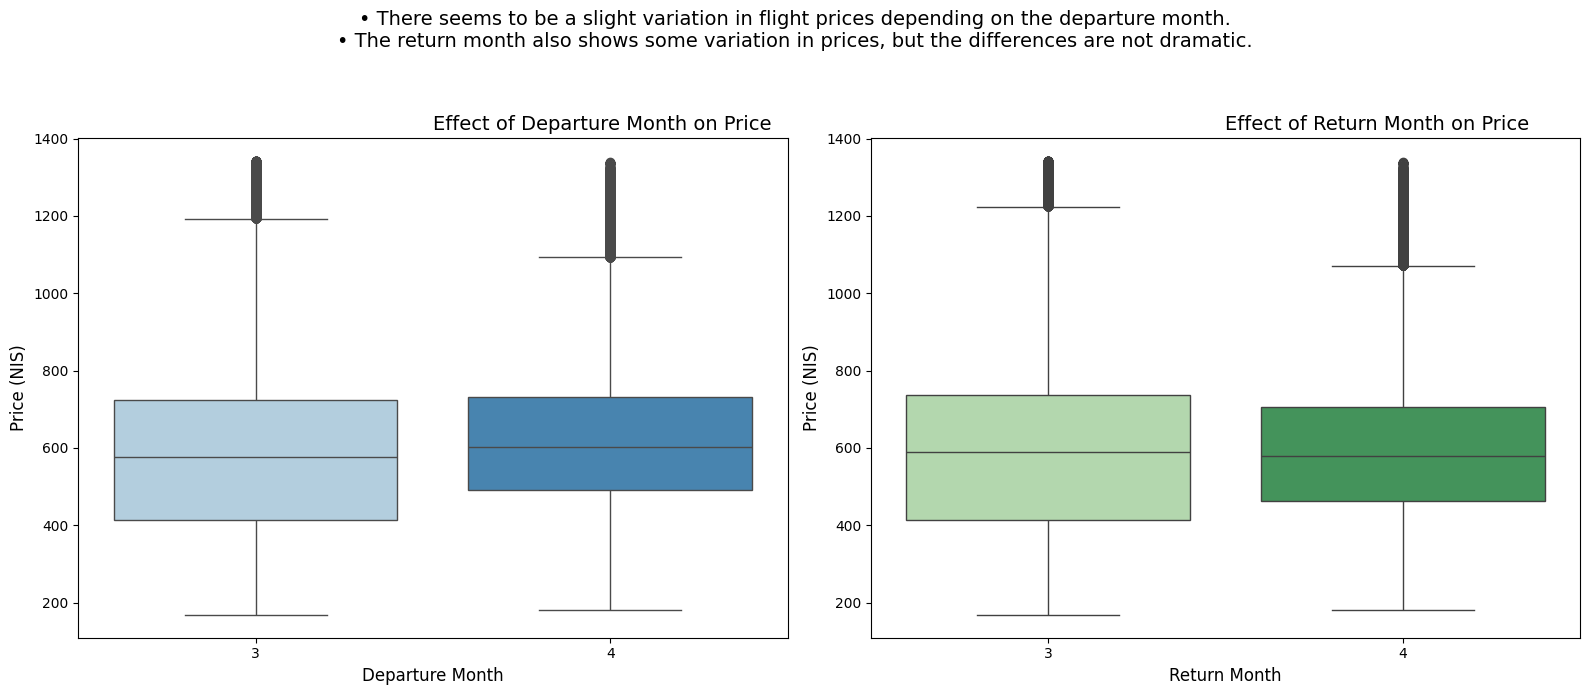

In [74]:
# Create the plot for Departure Month vs Price
plt.figure(figsize=(16, 6))

# Subplot for Departure Month
plt.subplot(1, 2, 1)
sns.boxplot(data=data_copy, x='Departure Month', y='Price(NIS)', palette='Blues')
plt.title('Effect of Departure Month on Price', fontsize=14, ha='left')
plt.xlabel('Departure Month', fontsize=12)
plt.ylabel('Price (NIS)', fontsize=12)

# Subplot for Return Month
plt.subplot(1, 2, 2)
sns.boxplot(data=data_copy, x='Return Month', y='Price(NIS)', palette='Greens')
plt.title('Effect of Return Month on Price', fontsize=14, ha='left')
plt.xlabel('Return Month', fontsize=12)
plt.ylabel('Price (NIS)', fontsize=12)

# Adding conclusions as text above the graph
conclusions = (
    "• There seems to be a slight variation in flight prices depending on the departure month.\n"
    "• The return month also shows some variation in prices, but the differences are not dramatic."
)
plt.figtext(0.5, 1.15, conclusions, ha="center", va="top", fontsize=14, color="black")

# Adjust the layout
plt.tight_layout()
plt.show()

In [ ]:
# # שמירה של הדאטה המעובד לשאר מחברות הקוד
# data_copy.to_csv('clean_data.csv', index=False)